# Notebook
## Does the architecture of 5’ regions in human protein-coding genes plays a role in alternative splicing?

NB : all variables & filters using the word CDS are corresponding to the TER concept in the paper

In [83]:
# General imports
import os
import sys
import pandas as pd
import scipy
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from tqdm import tqdm
# Other imports
tqdm.pandas()
import yaml

# Custom utils
sys.path.append("/home/weber/PycharmProjects/EXOTIC/src")
from utils.utils import load_config_file

# Figures imports
import matplotlib
from matplotlib.lines import Line2D   
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from statannot import add_stat_annotation
import matplotlib.font_manager as font_manager
import string

## YAML FILES CONFIG
yaml = yaml.load(open("/home/weber/PycharmProjects/gene_isoforms/src/config/config_files.yaml"), Loader=yaml.FullLoader)
base_dir = yaml['base_directory']
[os.makedirs(base_dir + e, exist_ok=True) for e in yaml if e != "base_directory"]
dicts = json.load(open("/home/weber/PycharmProjects/EXOTIC/src/EXOTIC_config.json"))


# Font settings
font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

pvalues_cutoff = [
        1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1, 1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4, 1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5, 1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6, 1e-7, 2e-7, 3e-7, 4e-7, 5e-7, 6e-7, 7e-7, 8e-7, 9e-7, 1e-8, 2e-8, 3e-8, 4e-8, 5e-8, 6e-8, 7e-8, 8e-8, 9e-8, 1e-9, 2e-9, 3e-9, 4e-9, 5e-9, 6e-9, 7e-9, 8e-9, 9e-9, 1e-10, 2e-10, 3e-10, 4e-10, 5e-10, 6e-10, 7e-10, 8e-10, 9e-10, 1e-11, 2e-11, 3e-11, 4e-11, 5e-11, 6e-11, 7e-11, 8e-11, 9e-11, 1e-12, 2e-12, 3e-12, 4e-12, 5e-12, 6e-12, 7e-12, 8e-12, 9e-12, 1e-13, 2e-13, 3e-13, 4e-13, 5e-13, 6e-13, 7e-13, 8e-13, 9e-13, 1e-14, 2e-14, 3e-14, 4e-14, 5e-14, 6e-14, 7e-14, 8e-14, 9e-14, 1e-15, 2e-15, 3e-15, 4e-15, 5e-15, 6e-15, 7e-15, 8e-15, 9e-15, 1e-16, 2e-16, 3e-16, 4e-16, 5e-16, 6e-16, 7e-16, 8e-16, 9e-16, 1e-17, 2e-17, 3e-17, 4e-17, 5e-17, 6e-17, 7e-17, 8e-17, 9e-17, 1e-18, 2e-18, 3e-18, 4e-18, 5e-18, 6e-18, 7e-18, 8e-18, 9e-18, 1e-19, 2e-19, 3e-19, 4e-19, 5e-19, 6e-19, 7e-19, 8e-19, 9e-19, 1e-20, 2e-20, 3e-20, 4e-20, 5e-20, 6e-20, 7e-20, 8e-20, 9e-20, 1e-21, 2e-21, 3e-21, 4e-21, 5e-21, 6e-21, 7e-21, 8e-21, 9e-21, 1e-22, 2e-22, 3e-22, 4e-22, 5e-22, 6e-22, 7e-22, 8e-22, 9e-22, 1e-23, 2e-23, 3e-23, 4e-23, 5e-23, 6e-23, 7e-23, 8e-23, 9e-23, 1e-24, 2e-24, 3e-24, 4e-24, 5e-24, 6e-24, 7e-24, 8e-24, 9e-24, 1e-25, 2e-25, 3e-25, 4e-25, 5e-25, 6e-25, 7e-25, 8e-25, 9e-25, 1e-26, 2e-26, 3e-26, 4e-26, 5e-26, 6e-26, 7e-26, 8e-26, 9e-26, 1e-27, 2e-27, 3e-27, 4e-27, 5e-27, 6e-27, 7e-27, 8e-27, 9e-27, 1e-28, 2e-28, 3e-28, 4e-28, 5e-28, 6e-28, 7e-28, 8e-28, 9e-28, 1e-29, 2e-29, 3e-29, 4e-29, 5e-29, 6e-29, 7e-29, 8e-29, 9e-29, 1e-30, 2e-30, 3e-30, 4e-30, 5e-30, 6e-30, 7e-30, 8e-30, 9e-30, 1e-31, 2e-31, 3e-31, 4e-31, 5e-31, 6e-31, 7e-31, 8e-31, 9e-31, 1e-32, 2e-32, 3e-32, 4e-32, 5e-32, 6e-32, 7e-32, 8e-32, 9e-32, 1e-33, 2e-33, 3e-33, 4e-33, 5e-33, 6e-33, 7e-33, 8e-33, 9e-33, 1e-34, 2e-34, 3e-34, 4e-34, 5e-34, 6e-34, 7e-34, 8e-34, 9e-34, 1e-35, 2e-35, 3e-35, 4e-35, 5e-35, 6e-35, 7e-35, 8e-35, 9e-35, 1e-36, 2e-36, 3e-36, 4e-36, 5e-36, 6e-36, 7e-36, 8e-36, 9e-36, 1e-37, 2e-37, 3e-37, 4e-37, 5e-37, 6e-37, 7e-37, 8e-37, 9e-37, 1e-38, 2e-38, 3e-38, 4e-38, 5e-38, 6e-38, 7e-38, 8e-38, 9e-38, 1e-39, 2e-39, 3e-39, 4e-39, 5e-39, 6e-39, 7e-39, 8e-39, 9e-39, 1e-40, 2e-40, 3e-40, 4e-40, 5e-40, 6e-40, 7e-40, 8e-40, 9e-40, 1e-41, 2e-41, 3e-41, 4e-41, 5e-41, 6e-41, 7e-41, 8e-41, 9e-41, 1e-42, 2e-42, 3e-42, 4e-42, 5e-42, 6e-42, 7e-42, 8e-42, 9e-42, 1e-43, 2e-43, 3e-43, 4e-43, 5e-43, 6e-43, 7e-43, 8e-43, 9e-43, 1e-44, 2e-44, 3e-44, 4e-44, 5e-44, 6e-44, 7e-44, 8e-44, 9e-44, 1e-45, 2e-45, 3e-45, 4e-45, 5e-45, 6e-45, 7e-45, 8e-45, 9e-45, 1e-46, 2e-46, 3e-46, 4e-46, 5e-46, 6e-46, 7e-46, 8e-46, 9e-46, 1e-47, 2e-47, 3e-47, 4e-47, 5e-47, 6e-47, 7e-47, 8e-47, 9e-47, 1e-48, 2e-48, 3e-48, 4e-48, 5e-48, 6e-48, 7e-48, 8e-48, 9e-48, 1e-49, 2e-49, 3e-49, 4e-49, 5e-49, 6e-49, 7e-49, 8e-49, 9e-49, 1e-50, 2e-50, 3e-50, 4e-50, 5e-50, 6e-50, 7e-50, 8e-50, 9e-50, 1e-51, 2e-51, 3e-51, 4e-51, 5e-51, 6e-51, 7e-51, 8e-51, 9e-51, 1e-52, 2e-52, 3e-52, 4e-52, 5e-52, 6e-52, 7e-52, 8e-52, 9e-52, 1e-53, 2e-53, 3e-53, 4e-53, 5e-53, 6e-53, 7e-53, 8e-53, 9e-53, 1e-54, 2e-54, 3e-54, 4e-54, 5e-54, 6e-54, 7e-54, 8e-54, 9e-54, 1e-55, 2e-55, 3e-55, 4e-55, 5e-55, 6e-55, 7e-55, 8e-55, 9e-55, 1e-56, 2e-56, 3e-56, 4e-56, 5e-56, 6e-56, 7e-56, 8e-56, 9e-56, 1e-57, 2e-57, 3e-57, 4e-57, 5e-57, 6e-57, 7e-57, 8e-57, 9e-57, 1e-58, 2e-58, 3e-58, 4e-58, 5e-58, 6e-58, 7e-58, 8e-58, 9e-58, 1e-59, 2e-59, 3e-59, 4e-59, 5e-59, 6e-59, 7e-59, 8e-59, 9e-59, 1e-60, 2e-60, 3e-60, 4e-60, 5e-60, 6e-60, 7e-60, 8e-60, 9e-60, 1e-61, 2e-61, 3e-61, 4e-61, 5e-61, 6e-61, 7e-61, 8e-61, 9e-61, 1e-62, 2e-62, 3e-62, 4e-62, 5e-62, 6e-62, 7e-62, 8e-62, 9e-62, 1e-63, 2e-63, 3e-63, 4e-63, 5e-63, 6e-63, 7e-63, 8e-63, 9e-63, 1e-64, 2e-64, 3e-64, 4e-64, 5e-64, 6e-64, 7e-64, 8e-64, 9e-64, 1e-65, 2e-65, 3e-65, 4e-65, 5e-65, 6e-65, 7e-65, 8e-65, 9e-65, 1e-66, 2e-66, 3e-66, 4e-66, 5e-66, 6e-66, 7e-66, 8e-66, 9e-66, 1e-67, 2e-67, 3e-67, 4e-67, 5e-67, 6e-67, 7e-67, 8e-67, 9e-67, 1e-68, 2e-68, 3e-68, 4e-68, 5e-68, 6e-68, 7e-68, 8e-68, 9e-68, 1e-69, 2e-69, 3e-69, 4e-69, 5e-69, 6e-69, 7e-69, 8e-69, 9e-69, 1e-70, 2e-70, 3e-70, 4e-70, 5e-70, 6e-70, 7e-70, 8e-70, 9e-70, 1e-71, 2e-71, 3e-71, 4e-71, 5e-71, 6e-71, 7e-71, 8e-71, 9e-71, 1e-72, 2e-72, 3e-72, 4e-72, 5e-72, 6e-72, 7e-72, 8e-72, 9e-72, 1e-73, 2e-73, 3e-73, 4e-73, 5e-73, 6e-73, 7e-73, 8e-73, 9e-73, 1e-74, 2e-74, 3e-74, 4e-74, 5e-74, 6e-74, 7e-74, 8e-74, 9e-74, 1e-75, 2e-75, 3e-75, 4e-75, 5e-75, 6e-75, 7e-75, 8e-75, 9e-75, 1e-76, 2e-76, 3e-76, 4e-76, 5e-76, 6e-76, 7e-76, 8e-76, 9e-76, 1e-77, 2e-77, 3e-77, 4e-77, 5e-77, 6e-77, 7e-77, 8e-77, 9e-77, 1e-78, 2e-78, 3e-78, 4e-78, 5e-78, 6e-78, 7e-78, 8e-78, 9e-78, 1e-79, 2e-79, 3e-79, 4e-79, 5e-79, 6e-79, 7e-79, 8e-79, 9e-79, 1e-80, 2e-80, 3e-80, 4e-80, 5e-80, 6e-80, 7e-80, 8e-80, 9e-80, 1e-81, 2e-81, 3e-81, 4e-81, 5e-81, 6e-81, 7e-81, 8e-81, 9e-81, 1e-82, 2e-82, 3e-82, 4e-82, 5e-82, 6e-82, 7e-82, 8e-82, 9e-82, 1e-83, 2e-83, 3e-83, 4e-83, 5e-83, 6e-83, 7e-83, 8e-83, 9e-83, 1e-84, 2e-84, 3e-84, 4e-84, 5e-84, 6e-84, 7e-84, 8e-84, 9e-84, 1e-85, 2e-85, 3e-85, 4e-85, 5e-85, 6e-85, 7e-85, 8e-85, 9e-85, 1e-86, 2e-86, 3e-86, 4e-86, 5e-86, 6e-86, 7e-86, 8e-86, 9e-86, 1e-87, 2e-87, 3e-87, 4e-87, 5e-87, 6e-87, 7e-87, 8e-87, 9e-87, 1e-88, 2e-88, 3e-88, 4e-88, 5e-88, 6e-88, 7e-88, 8e-88, 9e-88, 1e-89, 2e-89, 3e-89, 4e-89, 5e-89, 6e-89, 7e-89, 8e-89, 9e-89, 1e-90, 2e-90, 3e-90, 4e-90, 5e-90, 6e-90, 7e-90, 8e-90, 9e-90, 1e-91, 2e-91, 3e-91, 4e-91, 5e-91, 6e-91, 7e-91, 8e-91, 9e-91, 1e-92, 2e-92, 3e-92, 4e-92, 5e-92, 6e-92, 7e-92, 8e-92, 9e-92, 1e-93, 2e-93, 3e-93, 4e-93, 5e-93, 6e-93, 7e-93, 8e-93, 9e-93, 1e-94, 2e-94, 3e-94, 4e-94, 5e-94, 6e-94, 7e-94, 8e-94, 9e-94, 1e-95, 2e-95, 3e-95, 4e-95, 5e-95, 6e-95, 7e-95, 8e-95, 9e-95, 1e-96, 2e-96, 3e-96, 4e-96, 5e-96, 6e-96, 7e-96, 8e-96, 9e-96, 1e-97, 2e-97, 3e-97, 4e-97, 5e-97, 6e-97, 7e-97, 8e-97, 9e-97, 1e-98, 2e-98, 3e-98, 4e-98, 5e-98, 6e-98, 7e-98, 8e-98, 9e-98, 1e-99, 2e-99, 3e-99, 4e-99, 5e-99, 6e-99, 7e-99, 8e-99, 9e-99, 1e-100, 2e-100, 3e-100, 4e-100, 5e-100, 6e-100, 7e-100, 8e-100, 9e-100, 1e-101, 2e-101, 3e-101, 4e-101, 5e-101, 6e-101, 7e-101, 8e-101, 9e-101, 1e-102, 2e-102, 3e-102, 4e-102, 5e-102, 6e-102, 7e-102, 8e-102, 9e-102, 1e-103, 2e-103, 3e-103, 4e-103, 5e-103, 6e-103, 7e-103, 8e-103, 9e-103, 1e-104, 2e-104, 3e-104, 4e-104, 5e-104, 6e-104, 7e-104, 8e-104, 9e-104, 1e-105, 2e-105, 3e-105, 4e-105, 5e-105, 6e-105, 7e-105, 8e-105, 9e-105, 1e-106, 2e-106, 3e-106, 4e-106, 5e-106, 6e-106, 7e-106, 8e-106, 9e-106, 1e-107, 2e-107, 3e-107, 4e-107, 5e-107, 6e-107, 7e-107, 8e-107, 9e-107, 1e-108, 2e-108, 3e-108, 4e-108, 5e-108, 6e-108, 7e-108, 8e-108, 9e-108, 1e-109, 2e-109, 3e-109, 4e-109, 5e-109, 6e-109, 7e-109, 8e-109, 9e-109, 1e-110, 2e-110, 3e-110, 4e-110, 5e-110, 6e-110, 7e-110, 8e-110, 9e-110, 1e-111, 2e-111, 3e-111, 4e-111, 5e-111, 6e-111, 7e-111, 8e-111, 9e-111, 1e-112, 2e-112, 3e-112, 4e-112, 5e-112, 6e-112, 7e-112, 8e-112, 9e-112, 1e-113, 2e-113, 3e-113, 4e-113, 5e-113, 6e-113, 7e-113, 8e-113, 9e-113, 1e-114, 2e-114, 3e-114, 4e-114, 5e-114, 6e-114, 7e-114, 8e-114, 9e-114, 1e-115, 2e-115, 3e-115, 4e-115, 5e-115, 6e-115, 7e-115, 8e-115, 9e-115, 1e-116, 2e-116, 3e-116, 4e-116, 5e-116, 6e-116, 7e-116, 8e-116, 9e-116, 1e-117, 2e-117, 3e-117, 4e-117, 5e-117, 6e-117, 7e-117, 8e-117, 9e-117, 1e-118, 2e-118, 3e-118, 4e-118, 5e-118, 6e-118, 7e-118, 8e-118, 9e-118, 1e-119, 2e-119, 3e-119, 4e-119, 5e-119, 6e-119, 7e-119, 8e-119, 9e-119, 1e-120, 2e-120, 3e-120, 4e-120, 5e-120, 6e-120, 7e-120, 8e-120, 9e-120, 1e-121, 2e-121, 3e-121, 4e-121, 5e-121, 6e-121, 7e-121, 8e-121, 9e-121, 1e-122, 2e-122, 3e-122, 4e-122, 5e-122, 6e-122, 7e-122, 8e-122, 9e-122, 1e-123, 2e-123, 3e-123, 4e-123, 5e-123, 6e-123, 7e-123, 8e-123, 9e-123, 1e-124, 2e-124, 3e-124, 4e-124, 5e-124, 6e-124, 7e-124, 8e-124, 9e-124, 1e-125, 2e-125, 3e-125, 4e-125, 5e-125, 6e-125, 7e-125, 8e-125, 9e-125, 1e-126, 2e-126, 3e-126, 4e-126, 5e-126, 6e-126, 7e-126, 8e-126, 9e-126, 1e-127, 2e-127, 3e-127, 4e-127, 5e-127, 6e-127, 7e-127, 8e-127, 9e-127, 1e-128, 2e-128, 3e-128, 4e-128, 5e-128, 6e-128, 7e-128, 8e-128, 9e-128, 1e-129, 2e-129, 3e-129, 4e-129, 5e-129, 6e-129, 7e-129, 8e-129, 9e-129, 1e-130, 2e-130, 3e-130, 4e-130, 5e-130, 6e-130, 7e-130, 8e-130, 9e-130, 1e-131, 2e-131, 3e-131, 4e-131, 5e-131, 6e-131, 7e-131, 8e-131, 9e-131, 1e-132, 2e-132, 3e-132, 4e-132, 5e-132, 6e-132, 7e-132, 8e-132, 9e-132, 1e-133, 2e-133, 3e-133, 4e-133, 5e-133, 6e-133, 7e-133, 8e-133, 9e-133, 1e-134, 2e-134, 3e-134, 4e-134, 5e-134, 6e-134, 7e-134, 8e-134, 9e-134, 1e-135, 2e-135, 3e-135, 4e-135, 5e-135, 6e-135, 7e-135, 8e-135, 9e-135, 1e-136, 2e-136, 3e-136, 4e-136, 5e-136, 6e-136, 7e-136, 8e-136, 9e-136, 1e-137, 2e-137, 3e-137, 4e-137, 5e-137, 6e-137, 7e-137, 8e-137, 9e-137, 1e-138, 2e-138, 3e-138, 4e-138, 5e-138, 6e-138, 7e-138, 8e-138, 9e-138, 1e-139, 2e-139, 3e-139, 4e-139, 5e-139, 6e-139, 7e-139, 8e-139, 9e-139, 1e-140, 2e-140, 3e-140, 4e-140, 5e-140, 6e-140, 7e-140, 8e-140, 9e-140, 1e-141, 2e-141, 3e-141, 4e-141, 5e-141, 6e-141, 7e-141, 8e-141, 9e-141, 1e-142, 2e-142, 3e-142, 4e-142, 5e-142, 6e-142, 7e-142, 8e-142, 9e-142, 1e-143, 2e-143, 3e-143, 4e-143, 5e-143, 6e-143, 7e-143, 8e-143, 9e-143, 1e-144, 2e-144, 3e-144, 4e-144, 5e-144, 6e-144, 7e-144, 8e-144, 9e-144, 1e-145, 2e-145, 3e-145, 4e-145, 5e-145, 6e-145, 7e-145, 8e-145, 9e-145, 1e-146, 2e-146, 3e-146, 4e-146, 5e-146, 6e-146, 7e-146, 8e-146, 9e-146, 1e-147, 2e-147, 3e-147, 4e-147, 5e-147, 6e-147, 7e-147, 8e-147, 9e-147, 1e-148, 2e-148, 3e-148, 4e-148, 5e-148, 6e-148, 7e-148, 8e-148, 9e-148, 1e-149, 2e-149, 3e-149, 4e-149, 5e-149, 6e-149, 7e-149, 8e-149, 9e-149, 1e-150, 2e-150, 3e-150, 4e-150, 5e-150, 6e-150, 7e-150, 8e-150, 9e-150, 1e-151, 2e-151, 3e-151, 4e-151, 5e-151, 6e-151, 7e-151, 8e-151, 9e-151, 1e-152, 2e-152, 3e-152, 4e-152, 5e-152, 6e-152, 7e-152, 8e-152, 9e-152, 1e-153, 2e-153, 3e-153, 
        4e-153, 5e-153, 6e-153, 7e-153, 8e-153, 9e-153, 1e-154, 2e-154, 3e-154, 4e-154, 5e-154, 6e-154, 7e-154, 8e-154, 9e-154, 1e-155, 2e-155, 3e-155, 4e-155, 5e-155, 6e-155, 7e-155, 8e-155, 9e-155, 1e-156, 2e-156, 3e-156, 4e-156, 5e-156, 6e-156, 7e-156, 8e-156, 9e-156, 1e-157, 2e-157, 3e-157, 4e-157, 5e-157, 6e-157, 7e-157, 8e-157, 9e-157, 1e-158, 2e-158, 3e-158, 4e-158, 5e-158, 6e-158, 7e-158, 8e-158, 9e-158, 1e-159, 2e-159, 3e-159, 4e-159, 5e-159, 6e-159, 7e-159, 8e-159, 9e-159, 1e-160, 2e-160, 3e-160, 4e-160, 5e-160, 6e-160, 7e-160, 8e-160, 9e-160, 1e-161, 2e-161, 3e-161, 4e-161, 5e-161, 6e-161, 7e-161, 8e-161, 9e-161, 1e-162, 2e-162, 3e-162, 4e-162, 5e-162, 6e-162, 7e-162, 8e-162, 9e-162, 1e-163, 2e-163, 3e-163, 4e-163, 5e-163, 6e-163, 7e-163, 8e-163, 9e-163, 1e-164, 2e-164, 3e-164, 4e-164, 5e-164, 6e-164, 7e-164, 8e-164, 9e-164, 1e-165, 2e-165, 3e-165, 4e-165, 5e-165, 6e-165, 7e-165, 8e-165, 9e-165, 1e-166, 2e-166, 3e-166, 4e-166, 5e-166, 6e-166, 7e-166, 8e-166, 9e-166, 1e-167, 2e-167, 3e-167, 4e-167, 5e-167, 6e-167, 7e-167, 8e-167, 9e-167, 1e-168, 2e-168, 3e-168, 4e-168, 5e-168, 6e-168, 7e-168, 8e-168, 9e-168, 1e-169, 2e-169, 3e-169, 4e-169, 5e-169, 6e-169, 7e-169, 8e-169, 9e-169, 1e-170, 2e-170, 3e-170, 4e-170, 5e-170, 6e-170, 7e-170, 8e-170, 9e-170, 1e-171, 2e-171, 3e-171, 4e-171, 5e-171, 6e-171, 7e-171, 8e-171, 9e-171, 1e-172, 2e-172, 3e-172, 4e-172, 5e-172, 6e-172, 7e-172, 8e-172, 9e-172, 1e-173, 2e-173, 3e-173, 4e-173, 5e-173, 6e-173, 7e-173, 8e-173, 9e-173, 1e-174, 2e-174, 3e-174, 4e-174, 5e-174, 6e-174, 7e-174, 8e-174, 9e-174, 1e-175, 2e-175, 3e-175, 4e-175, 5e-175, 6e-175, 7e-175, 8e-175, 9e-175, 1e-176, 2e-176, 3e-176, 4e-176, 5e-176, 6e-176, 7e-176, 8e-176, 9e-176, 1e-177, 2e-177, 3e-177, 4e-177, 5e-177, 6e-177, 7e-177, 8e-177, 9e-177, 1e-178, 2e-178, 3e-178, 4e-178, 5e-178, 6e-178, 7e-178, 8e-178, 9e-178, 1e-179, 2e-179, 3e-179, 4e-179, 5e-179, 6e-179, 7e-179, 8e-179, 9e-179, 1e-180, 2e-180, 3e-180, 4e-180, 5e-180, 6e-180, 7e-180, 8e-180, 9e-180, 1e-181, 2e-181, 3e-181, 4e-181, 5e-181, 6e-181, 7e-181, 8e-181, 9e-181, 1e-182, 2e-182, 3e-182, 4e-182, 5e-182, 6e-182, 7e-182, 8e-182, 9e-182, 1e-183, 2e-183, 3e-183, 4e-183, 5e-183, 6e-183, 7e-183, 8e-183, 9e-183, 1e-184, 2e-184, 3e-184, 4e-184, 5e-184, 6e-184, 7e-184, 8e-184, 9e-184, 1e-185, 2e-185, 3e-185, 4e-185, 5e-185, 6e-185, 7e-185, 8e-185, 9e-185, 1e-186, 2e-186, 3e-186, 4e-186, 5e-186, 6e-186, 7e-186, 8e-186, 9e-186, 1e-187, 2e-187, 3e-187, 4e-187, 5e-187, 6e-187, 7e-187, 8e-187, 9e-187, 1e-188, 2e-188, 3e-188, 4e-188, 5e-188, 6e-188, 7e-188, 8e-188, 9e-188, 1e-189, 2e-189, 3e-189, 4e-189, 5e-189, 6e-189, 7e-189, 8e-189, 9e-189, 1e-190, 2e-190, 3e-190, 4e-190, 5e-190, 6e-190, 7e-190, 8e-190, 9e-190, 1e-191, 2e-191, 3e-191, 4e-191, 5e-191, 6e-191, 7e-191, 8e-191, 9e-191, 1e-192, 2e-192, 3e-192, 4e-192, 5e-192, 6e-192, 7e-192, 8e-192, 9e-192, 1e-193, 2e-193, 3e-193, 4e-193, 5e-193, 6e-193, 7e-193, 8e-193, 9e-193, 1e-194, 2e-194, 3e-194, 4e-194, 5e-194, 6e-194, 7e-194, 8e-194, 9e-194, 1e-195, 2e-195, 3e-195, 4e-195, 5e-195, 6e-195, 7e-195, 8e-195, 9e-195, 1e-196, 2e-196, 3e-196, 4e-196, 5e-196, 6e-196, 7e-196, 8e-196, 9e-196, 1e-197, 2e-197, 3e-197, 4e-197, 5e-197, 6e-197, 7e-197, 8e-197, 9e-197, 1e-198, 2e-198, 3e-198, 4e-198, 5e-198, 6e-198, 7e-198, 8e-198, 9e-198, 1e-199, 2e-199, 3e-199, 4e-199, 5e-199, 6e-199, 7e-199, 8e-199, 9e-199, 1e-200, 2e-200, 3e-200, 4e-200, 5e-200, 6e-200, 7e-200, 8e-200, 9e-200, 1e-201, 2e-201, 3e-201, 4e-201, 5e-201, 6e-201, 7e-201, 8e-201, 9e-201, 1e-202, 2e-202, 3e-202, 4e-202, 5e-202, 6e-202, 7e-202, 8e-202, 9e-202, 1e-203, 2e-203, 3e-203, 4e-203, 5e-203, 6e-203, 7e-203, 8e-203, 9e-203, 1e-204, 2e-204, 3e-204, 4e-204, 5e-204, 6e-204, 7e-204, 8e-204, 9e-204, 1e-205, 2e-205, 3e-205, 4e-205, 5e-205, 6e-205, 7e-205, 8e-205, 9e-205, 1e-206, 2e-206, 3e-206, 4e-206, 5e-206, 6e-206, 7e-206, 8e-206, 9e-206, 1e-207, 2e-207, 3e-207, 4e-207, 5e-207, 6e-207, 7e-207, 8e-207, 9e-207, 1e-208, 2e-208, 3e-208, 4e-208, 5e-208, 6e-208, 7e-208, 8e-208, 9e-208, 1e-209, 2e-209, 3e-209, 4e-209, 5e-209, 6e-209, 7e-209, 8e-209, 9e-209, 1e-210, 2e-210, 3e-210, 4e-210, 5e-210, 6e-210, 7e-210, 8e-210, 9e-210, 1e-211, 2e-211, 3e-211, 4e-211, 5e-211, 6e-211, 7e-211, 8e-211, 9e-211, 1e-212, 2e-212, 3e-212, 4e-212, 5e-212, 6e-212, 7e-212, 8e-212, 9e-212, 1e-213, 2e-213, 3e-213, 4e-213, 5e-213, 6e-213, 7e-213, 8e-213, 9e-213, 1e-214, 2e-214, 3e-214, 4e-214, 5e-214, 6e-214, 7e-214, 8e-214, 9e-214, 1e-215, 2e-215, 3e-215, 4e-215, 5e-215, 6e-215, 7e-215, 8e-215, 9e-215, 1e-216, 2e-216, 3e-216, 4e-216, 5e-216, 6e-216, 7e-216, 8e-216, 9e-216, 1e-217, 2e-217, 3e-217, 4e-217, 5e-217, 6e-217, 7e-217, 8e-217, 9e-217, 1e-218, 2e-218, 3e-218, 4e-218, 5e-218, 6e-218, 7e-218, 8e-218, 9e-218, 1e-219, 2e-219, 3e-219, 4e-219, 5e-219, 6e-219, 7e-219, 8e-219, 9e-219, 1e-220, 2e-220, 3e-220, 4e-220, 5e-220, 6e-220, 7e-220, 8e-220, 9e-220, 1e-221, 2e-221, 3e-221, 4e-221, 5e-221, 6e-221, 7e-221, 8e-221, 9e-221, 1e-222, 2e-222, 3e-222, 4e-222, 5e-222, 6e-222, 7e-222, 8e-222, 9e-222, 1e-223, 2e-223, 3e-223, 4e-223, 5e-223, 6e-223, 7e-223, 8e-223, 9e-223, 1e-224, 2e-224, 3e-224, 4e-224, 5e-224, 6e-224, 7e-224, 8e-224, 9e-224, 1e-225, 2e-225, 3e-225, 4e-225, 5e-225, 6e-225, 7e-225, 8e-225, 9e-225, 1e-226, 2e-226, 3e-226, 4e-226, 5e-226, 6e-226, 7e-226, 8e-226, 9e-226, 1e-227, 2e-227, 3e-227, 4e-227, 5e-227, 6e-227, 7e-227, 8e-227, 9e-227, 1e-228, 2e-228, 3e-228, 4e-228, 5e-228, 6e-228, 7e-228, 8e-228, 9e-228, 1e-229, 2e-229, 3e-229, 4e-229, 5e-229, 6e-229, 7e-229, 8e-229, 9e-229, 1e-230, 2e-230, 3e-230, 4e-230, 5e-230, 6e-230, 7e-230, 8e-230, 9e-230, 1e-231, 2e-231, 3e-231, 4e-231, 5e-231, 6e-231, 7e-231, 8e-231, 9e-231, 1e-232, 2e-232, 3e-232, 4e-232, 5e-232, 6e-232, 7e-232, 8e-232, 9e-232, 1e-233, 2e-233, 3e-233, 4e-233, 5e-233, 6e-233, 7e-233, 8e-233, 9e-233, 1e-234, 2e-234, 3e-234, 4e-234, 5e-234, 6e-234, 7e-234, 8e-234, 9e-234, 1e-235, 2e-235, 3e-235, 4e-235, 5e-235, 6e-235, 7e-235, 8e-235, 9e-235, 1e-236, 2e-236, 3e-236, 4e-236, 5e-236, 6e-236, 7e-236, 8e-236, 9e-236, 1e-237, 2e-237, 3e-237, 4e-237, 5e-237, 6e-237, 7e-237, 8e-237, 9e-237, 1e-238, 2e-238, 3e-238, 4e-238, 5e-238, 6e-238, 7e-238, 8e-238, 9e-238, 1e-239, 2e-239, 3e-239, 4e-239, 5e-239, 6e-239, 7e-239, 8e-239, 9e-239, 1e-240, 2e-240, 3e-240, 4e-240, 5e-240, 6e-240, 7e-240, 8e-240, 9e-240, 1e-241, 2e-241, 3e-241, 4e-241, 5e-241, 6e-241, 7e-241, 8e-241, 9e-241, 1e-242, 2e-242, 3e-242, 4e-242, 5e-242, 6e-242, 7e-242, 8e-242, 9e-242, 1e-243, 2e-243, 3e-243, 4e-243, 5e-243, 6e-243, 7e-243, 8e-243, 9e-243, 1e-244, 2e-244, 3e-244, 4e-244, 5e-244, 6e-244, 7e-244, 8e-244, 9e-244, 1e-245, 2e-245, 3e-245, 4e-245, 5e-245, 6e-245, 7e-245, 8e-245, 9e-245, 1e-246, 2e-246, 3e-246, 4e-246, 5e-246, 6e-246, 7e-246, 8e-246, 9e-246, 1e-247, 2e-247, 3e-247, 4e-247, 5e-247, 6e-247, 7e-247, 8e-247, 9e-247, 1e-248, 2e-248, 3e-248, 4e-248, 5e-248, 6e-248, 7e-248, 8e-248, 9e-248, 1e-249, 2e-249, 3e-249, 4e-249, 5e-249, 6e-249, 7e-249, 8e-249, 9e-249, 1e-250, 2e-250, 3e-250, 4e-250, 5e-250, 6e-250, 7e-250, 8e-250, 9e-250, 1e-251, 2e-251, 3e-251, 4e-251, 5e-251, 6e-251, 7e-251, 8e-251, 9e-251, 1e-252, 2e-252, 3e-252, 4e-252, 5e-252, 6e-252, 7e-252, 8e-252, 9e-252, 1e-253, 2e-253, 3e-253, 4e-253, 5e-253, 6e-253, 7e-253, 8e-253, 9e-253, 1e-254, 2e-254, 3e-254, 4e-254, 5e-254, 6e-254, 7e-254, 8e-254, 9e-254, 1e-255, 2e-255, 3e-255, 4e-255, 5e-255, 6e-255, 7e-255, 8e-255, 9e-255, 1e-256, 2e-256, 3e-256, 4e-256, 5e-256, 6e-256, 7e-256, 8e-256, 9e-256, 1e-257, 2e-257, 3e-257, 4e-257, 5e-257, 6e-257, 7e-257, 8e-257, 9e-257, 1e-258, 2e-258, 3e-258, 4e-258, 5e-258, 6e-258, 7e-258, 8e-258, 9e-258, 1e-259, 2e-259, 3e-259, 4e-259, 5e-259, 6e-259, 7e-259, 8e-259, 9e-259, 1e-260, 2e-260, 3e-260, 4e-260, 5e-260, 6e-260, 7e-260, 8e-260, 9e-260, 1e-261, 2e-261, 3e-261, 4e-261, 5e-261, 6e-261, 7e-261, 8e-261, 9e-261, 1e-262, 2e-262, 3e-262, 4e-262, 5e-262, 6e-262, 7e-262, 8e-262, 9e-262, 1e-263, 2e-263, 3e-263, 4e-263, 5e-263, 6e-263, 7e-263, 8e-263, 9e-263, 1e-264, 2e-264, 3e-264, 4e-264, 5e-264, 6e-264, 7e-264, 8e-264, 9e-264, 1e-265, 2e-265, 3e-265, 4e-265, 5e-265, 6e-265, 7e-265, 8e-265, 9e-265, 1e-266, 2e-266, 3e-266, 4e-266, 5e-266, 6e-266, 7e-266, 8e-266, 9e-266, 1e-267, 2e-267, 3e-267, 4e-267, 5e-267, 6e-267, 7e-267, 8e-267, 9e-267, 1e-268, 2e-268, 3e-268, 4e-268, 5e-268, 6e-268, 7e-268, 8e-268, 9e-268, 1e-269, 2e-269, 3e-269, 4e-269, 5e-269, 6e-269, 7e-269, 8e-269, 9e-269, 1e-270, 2e-270, 3e-270, 4e-270, 5e-270, 6e-270, 7e-270, 8e-270, 9e-270, 1e-271, 2e-271, 3e-271, 4e-271, 5e-271, 6e-271, 7e-271, 8e-271, 9e-271, 1e-272, 2e-272, 3e-272, 4e-272, 5e-272, 6e-272, 7e-272, 8e-272, 9e-272, 1e-273, 2e-273, 3e-273, 4e-273, 5e-273, 6e-273, 7e-273, 8e-273, 9e-273, 1e-274, 2e-274, 3e-274, 4e-274, 5e-274, 6e-274, 7e-274, 8e-274, 9e-274, 1e-275, 2e-275, 3e-275, 4e-275, 5e-275, 6e-275, 7e-275, 8e-275, 9e-275, 1e-276, 2e-276, 3e-276, 4e-276, 5e-276, 6e-276, 7e-276, 8e-276, 9e-276, 1e-277, 2e-277, 3e-277, 4e-277, 5e-277, 6e-277, 7e-277, 8e-277, 9e-277, 1e-278, 2e-278, 3e-278, 4e-278, 5e-278, 6e-278, 7e-278, 8e-278, 9e-278, 1e-279, 2e-279, 3e-279, 4e-279, 5e-279, 6e-279, 7e-279, 8e-279, 9e-279, 1e-280, 2e-280, 3e-280, 4e-280, 5e-280, 6e-280, 7e-280, 8e-280, 9e-280, 1e-281, 2e-281, 3e-281, 4e-281, 5e-281, 6e-281, 7e-281, 8e-281, 9e-281, 1e-282, 2e-282, 3e-282, 4e-282, 5e-282, 6e-282, 7e-282, 8e-282, 9e-282, 1e-283, 2e-283, 3e-283, 4e-283, 5e-283, 6e-283, 7e-283, 8e-283, 9e-283, 1e-284, 2e-284, 3e-284, 4e-284, 5e-284, 6e-284, 7e-284, 8e-284, 9e-284, 1e-285, 2e-285, 3e-285, 4e-285, 5e-285, 6e-285, 7e-285, 8e-285, 9e-285, 1e-286, 2e-286, 3e-286, 4e-286, 5e-286, 6e-286, 7e-286, 8e-286, 9e-286, 1e-287, 2e-287, 3e-287, 4e-287, 5e-287, 6e-287, 7e-287, 8e-287, 9e-287, 1e-288, 2e-288, 3e-288, 4e-288, 5e-288, 6e-288, 7e-288, 8e-288, 9e-288, 1e-289, 2e-289, 3e-289, 4e-289, 5e-289, 6e-289, 7e-289, 8e-289, 9e-289, 1e-290, 2e-290, 3e-290, 4e-290, 5e-290, 6e-290, 7e-290, 8e-290, 9e-290, 1e-291, 2e-291, 3e-291, 4e-291, 5e-291, 6e-291, 7e-291, 8e-291, 9e-291, 1e-292, 2e-292, 
        3e-292, 4e-292, 5e-292, 6e-292, 7e-292, 8e-292, 9e-292, 1e-293, 2e-293, 3e-293, 4e-293, 5e-293, 6e-293, 7e-293, 8e-293, 9e-293, 1e-294, 2e-294, 3e-294, 4e-294, 5e-294, 6e-294, 7e-294, 8e-294, 9e-294, 1e-295, 2e-295, 3e-295, 4e-295, 5e-295, 6e-295, 7e-295, 8e-295, 9e-295, 1e-296, 2e-296, 3e-296, 4e-296, 5e-296, 6e-296, 7e-296, 8e-296, 9e-296, 1e-297, 2e-297, 3e-297, 4e-297, 5e-297, 6e-297, 7e-297, 8e-297, 9e-297, 1e-298, 2e-298, 3e-298, 4e-298, 5e-298, 6e-298, 7e-298, 8e-298, 9e-298, 1e-299, 2e-299, 3e-299, 4e-299, 5e-299, 6e-299, 7e-299, 8e-299, 9e-299, 1e-300, 2e-300, 3e-300, 4e-300, 5e-300, 6e-300, 7e-300, 8e-300, 9e-300, 1e-301, 2e-301, 3e-301, 4e-301, 5e-301, 6e-301, 7e-301, 8e-301, 9e-301, 1e-302, 2e-302, 3e-302, 4e-302, 5e-302, 6e-302, 7e-302, 8e-302, 9e-302, 1e-303, 2e-303, 3e-303, 4e-303, 5e-303, 6e-303, 7e-303, 8e-303, 9e-303, 1e-304, 2e-304, 3e-304, 4e-304, 5e-304, 6e-304, 7e-304, 8e-304, 9e-304, 1e-305, 2e-305, 3e-305, 4e-305, 5e-305, 6e-305, 7e-305, 8e-305, 9e-305, 1e-306, 2e-306, 3e-306, 4e-306, 5e-306, 6e-306, 7e-306, 8e-306, 9e-306, 1e-307, 2e-307, 3e-307, 4e-307, 5e-307, 6e-307, 7e-307, 8e-307, 9e-307, 1e-308, 2e-308, 3e-308, 4e-308, 5e-308, 6e-308, 7e-308, 8e-308, 9e-308, 1e-309, 2e-309, 3e-309, 4e-309, 5e-309, 6e-309, 7e-309, 8e-309, 9e-309, 1e-310, 2e-310, 3e-310, 4e-310, 5e-310, 6e-310, 7e-310, 8e-310, 9e-310, 1e-311, 2e-311, 3e-311, 4e-311, 5e-311, 6e-311, 7e-311, 8e-311, 9e-311, 1e-312, 2e-312, 3e-312, 4e-312, 5e-312, 6e-312, 7e-312, 8e-312, 9e-312, 1e-313, 2e-313, 3e-313, 4e-313, 5e-313, 6e-313, 7e-313, 8e-313, 9e-313, 1e-314, 2e-314, 3e-314, 4e-314, 5e-314, 6e-314, 7e-314, 8e-314, 9e-314, 1e-315, 2e-315, 3e-315, 4e-315, 5e-315, 6e-315, 7e-315, 8e-315, 9e-315, 1e-316, 2e-316, 3e-316, 4e-316, 5e-316, 6e-316, 7e-316, 8e-316, 9e-316, 1e-317, 2e-317, 3e-317, 4e-317, 5e-317, 6e-317, 7e-317, 8e-317, 9e-317, 1e-318, 2e-318, 3e-318, 4e-318, 5e-318, 6e-318, 7e-318, 8e-318, 9e-318, 1e-319, 2e-319, 3e-319, 4e-319, 5e-319, 6e-319, 7e-319, 8e-319, 9e-319, 1e-320, 2e-320, 3e-320, 4e-320, 5e-320, 6e-320, 7e-320, 8e-320, 9e-320, 1e-321, 2e-321, 3e-321, 4e-321, 5e-321, 6e-321, 7e-321, 8e-321, 9e-321, 1e-322, 2e-322, 3e-322, 4e-322, 5e-322, 6e-322, 7e-322, 8e-322, 9e-322, 1e-323, 2e-323, 3e-323, 4e-323, 5e-323, 6e-323, 7e-323, 8e-323, 9e-323, 1e-324, 2e-324, 3e-324, 4e-324, 5e-324, 6e-324, 7e-324, 8e-324, 9e-324, 1e-325, 2e-325, 3e-325, 4e-325, 5e-325, 6e-325, 7e-325, 8e-325, 9e-325, 1e-326, 2e-326, 3e-326, 4e-326, 5e-326, 6e-326, 7e-326, 8e-326, 9e-326, 1e-327, 2e-327, 3e-327, 4e-327, 5e-327, 6e-327, 7e-327, 8e-327, 9e-327, 1e-328, 2e-328, 3e-328, 4e-328, 5e-328, 6e-328, 7e-328, 8e-328, 9e-328, 1e-329, 2e-329, 3e-329, 4e-329, 5e-329, 6e-329, 7e-329, 8e-329, 9e-329, 1e-330, 2e-330, 3e-330, 4e-330, 5e-330, 6e-330, 7e-330, 8e-330, 9e-330, 1e-331, 2e-331, 3e-331, 4e-331, 5e-331, 6e-331, 7e-331, 8e-331, 9e-331, 1e-332, 2e-332, 3e-332, 4e-332, 5e-332, 6e-332, 7e-332, 8e-332, 9e-332, 1e-333, 2e-333, 3e-333, 4e-333, 5e-333, 6e-333, 7e-333, 8e-333, 9e-333, 1e-334, 2e-334, 3e-334, 4e-334, 5e-334, 6e-334, 7e-334, 8e-334, 9e-334, 1e-335, 2e-335, 3e-335, 4e-335, 5e-335, 6e-335, 7e-335, 8e-335, 9e-335, 1e-336, 2e-336, 3e-336, 4e-336, 5e-336, 6e-336, 7e-336, 8e-336, 9e-336, 1e-337, 2e-337, 3e-337, 4e-337, 5e-337, 6e-337, 7e-337, 8e-337, 9e-337, 1e-338, 2e-338, 3e-338, 4e-338, 5e-338, 6e-338, 7e-338, 8e-338, 9e-338, 1e-339, 2e-339, 3e-339, 4e-339, 5e-339, 6e-339, 7e-339, 8e-339, 9e-339, 1e-340, 2e-340, 3e-340, 4e-340, 5e-340, 6e-340, 7e-340, 8e-340, 9e-340, 1e-341, 2e-341, 3e-341, 4e-341, 5e-341, 6e-341, 7e-341, 8e-341, 9e-341, 1e-342, 2e-342, 3e-342, 4e-342, 5e-342, 6e-342, 7e-342, 8e-342, 9e-342, 1e-343, 2e-343, 3e-343, 4e-343, 5e-343, 6e-343, 7e-343, 8e-343, 9e-343, 1e-344, 2e-344, 3e-344, 4e-344, 5e-344, 6e-344, 7e-344, 8e-344, 9e-344, 1e-345, 2e-345, 3e-345, 4e-345, 5e-345, 6e-345, 7e-345, 8e-345, 9e-345, 1e-346, 2e-346, 3e-346, 4e-346, 5e-346, 6e-346, 7e-346, 8e-346, 9e-346, 1e-347, 2e-347, 3e-347, 4e-347, 5e-347, 6e-347, 7e-347, 8e-347, 9e-347, 1e-348, 2e-348, 3e-348, 4e-348, 5e-348, 6e-348, 7e-348, 8e-348, 9e-348, 1e-349, 2e-349, 3e-349, 4e-349, 5e-349, 6e-349, 7e-349, 8e-349, 9e-349, 1e-350, 2e-350, 3e-350, 4e-350, 5e-350, 6e-350, 7e-350, 8e-350, 9e-350,  
    ]

pvalues_cutoff = [[e, str(e)] for e in pvalues_cutoff]

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 18



/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


# Define Miso & Siso

In [42]:
refseq_genes = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_pc_genes"])
refseq_genes['Gene_length'] = refseq_genes['End'] - refseq_genes['Start']
refseq_genes['Gene'] = refseq_genes['Attributes'].apply(lambda r: [e.replace('ID=gene-', '') for e in r.split(';') if 'ID=' in e][0])
refseq_genes


refseq_mrna = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_mrnas"])
refseq_mrna['Gene'] = refseq_mrna['Attributes'].apply(lambda r: [e.replace('Parent=gene-', '') for e in r.split(';') if 'Parent' in e][0])
refseq_mrna = pd.merge(refseq_genes[['Gene']], refseq_mrna, on='Gene')
refseq_mrna['NM'] = refseq_mrna['Attributes'].apply(lambda r: [e.replace('ID=rna-', '') for e in r.split(';') if 'ID=' in e][0])

miso_siso = refseq_mrna.groupby('Gene')['NM'].nunique().reset_index()
miso_siso.loc[miso_siso['NM'] > 1, 'Miso_siso'] = 'Miso'
miso_siso.loc[miso_siso['NM'] == 1, 'Miso_siso'] = 'Siso'
miso_siso

,Gene,NM,Miso_siso
0,A1BG,1,Siso
1,A1CF,8,Miso
2,A2M,4,Miso
3,A2ML1,2,Miso
4,A3GALT2,1,Siso
...,...,...,...
19280,ZYG11A,2,Miso
19281,ZYG11B,1,Siso
19282,ZYX,3,Miso
19283,ZZEF1,1,Siso


# Characterize single TER genes

### Load RefSeq TER

In [43]:
refseq_cds = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_cds"])
refseq_cds['Length'] = refseq_cds['End'] - refseq_cds['Start']
refseq_cds = refseq_cds.loc[refseq_cds['Length'] > 0] 
refseq_cds['Gene'] = refseq_cds['Attributes'].apply(lambda r: [e.replace('gene=', '') for e in r.split(';') if 'gene=' in e][0])
refseq_cds['NP'] = refseq_cds['Attributes'].apply(lambda r: [e.replace('ID=cds-', '') for e in r.split(';') if 'ID=' in e][0])
refseq_cds['NM'] = refseq_cds['Attributes'].apply(lambda r: [e.replace('Parent=rna-', '') for e in r.split(';') if 'Parent=' in e][0])
refseq_cds.loc[refseq_cds['NP'].str.contains('-2'), 'Gene'] = refseq_cds.loc[refseq_cds['NP'].str.contains('-2'), 'Gene'] + '-2'
refseq_cds = pd.merge(refseq_cds, miso_siso[['Gene', 'Miso_siso']].drop_duplicates(), on='Gene')
refseq_cds[['Start', 'End']] = refseq_cds[['Start', 'End']].astype(int)
refseq_cds['ranges'] = refseq_cds['Start'].astype(str) + '-' + refseq_cds['End'].astype(str)
refseq_cds.head()

,NC,RefSeq_validation,Region_type,Start,End,Score,Strand,Phase,Attributes,Length,Gene,NP,NM,Miso_siso,ranges
0,NC_000001.11,BestRefSeq,CDS,65565,65573,.,+,0,ID=cds-NP_001005484.2;Parent=rna-NM_001005484....,8,OR4F5,NP_001005484.2,NM_001005484.2,Siso,65565-65573
1,NC_000001.11,BestRefSeq,CDS,69037,70008,.,+,0,ID=cds-NP_001005484.2;Parent=rna-NM_001005484....,971,OR4F5,NP_001005484.2,NM_001005484.2,Siso,69037-70008
2,NC_000001.11,BestRefSeq,CDS,450740,451678,.,-,0,ID=cds-NP_001005221.2;Parent=rna-NM_001005221....,938,OR4F29,NP_001005221.2,NM_001005221.2,Siso,450740-451678
3,NC_000001.11,BestRefSeq,CDS,685716,686654,.,-,0,ID=cds-NP_001005277.1;Parent=rna-NM_001005277....,938,OR4F16,NP_001005277.1,NM_001005277.1,Siso,685716-686654
4,NC_000001.11,BestRefSeq,CDS,924432,924948,.,+,0,ID=cds-NP_001372569.1;Parent=rna-NM_001385640....,516,SAMD11,NP_001372569.1,NM_001385640.1,Miso,924432-924948


### Load RefSeq Exons

In [44]:
refseq_exons_utr = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_exons"])
refseq_exons_utr['RNA_name'] = refseq_exons_utr['Attributes'].apply(lambda r: [e.replace('Parent=rna-', '') for e in r.split(';') if 'Parent' in e][0])
refseq_exons_utr['Exon_nb'] = refseq_exons_utr['Attributes'].apply(lambda r: int([e.replace('ID=exon-', '') for e in r.split(';') if 'ID' in e][0].split('-')[1]))
refseq_exons_utr['Length'] = refseq_exons_utr['End'] - refseq_exons_utr['Start'] + 1
refseq_exons_utr['Gene'] = refseq_exons_utr['Attributes'].apply(lambda r: [e.replace('gene=', '') for e in r.split(';') if 'gene=' in e][0])
refseq_exons_utr['ranges'] = refseq_exons_utr['Start'].astype(str) + '-' + refseq_exons_utr['End'].astype(str)
refseq_exons_utr.loc[refseq_exons_utr['RNA_name'].str.contains('-2'), 'Gene'] = refseq_exons_utr.loc[refseq_exons_utr['RNA_name'].str.contains('-2'), 'Gene'] + '-2'
refseq_exons_utr = pd.merge(refseq_exons_utr, miso_siso[['Gene', 'Miso_siso']].drop_duplicates(), on='Gene')
refseq_exons_utr.head()

,NC,RefSeq_validation,Region_type,Start,End,Score,Strand,Phase,Attributes,RNA_name,Exon_nb,Length,Gene,ranges,Miso_siso
0,NC_000001.11,BestRefSeq,exon,65419,65433,.,+,.,ID=exon-NM_001005484.2-1;Parent=rna-NM_0010054...,NM_001005484.2,1,15,OR4F5,65419-65433,Siso
1,NC_000001.11,BestRefSeq,exon,65520,65573,.,+,.,ID=exon-NM_001005484.2-2;Parent=rna-NM_0010054...,NM_001005484.2,2,54,OR4F5,65520-65573,Siso
2,NC_000001.11,BestRefSeq,exon,69037,71585,.,+,.,ID=exon-NM_001005484.2-3;Parent=rna-NM_0010054...,NM_001005484.2,3,2549,OR4F5,69037-71585,Siso
3,NC_000001.11,BestRefSeq,exon,450740,451678,.,-,.,ID=exon-NM_001005221.2-1;Parent=rna-NM_0010052...,NM_001005221.2,1,939,OR4F29,450740-451678,Siso
4,NC_000001.11,BestRefSeq,exon,685716,686654,.,-,.,ID=exon-NM_001005277.1-1;Parent=rna-NM_0010052...,NM_001005277.1,1,939,OR4F16,685716-686654,Siso


### Retrieve single TER genes

In [47]:
refseq_cds_count = refseq_cds.groupby(['Miso_siso', 'Gene', 'NM'])['ranges'].count().reset_index()
single_cds = refseq_cds_count.loc[refseq_cds_count['ranges'] == 1]
t = refseq_cds.groupby(['Miso_siso', 'Gene'])['ranges'].nunique()
single_cds_genes = t[t == 1].reset_index().Gene.values.tolist()
single_cds_transcripts = single_cds.drop_duplicates().NM.values.tolist()
print(t[t == 1].reset_index()['Miso_siso'].value_counts())

refseq_exons_count = refseq_exons_utr.groupby(['Miso_siso', 'Gene', 'RNA_name'])['ranges'].count().reset_index()
single_exon = refseq_exons_count.drop_duplicates().loc[refseq_exons_count['ranges'] == 1]
single_exon_transcripts = single_exon.drop_duplicates().RNA_name.values.tolist()
t = refseq_exons_utr.groupby(['Miso_siso', 'Gene'])['ranges'].nunique()
single_exon_genes = t[t == 1].reset_index().Gene.values.tolist()
print(t[t == 1].reset_index()['Miso_siso'].value_counts())

Siso    1610
Miso     373
Name: Miso_siso, dtype: int64
Siso    995
Miso      2
Name: Miso_siso, dtype: int64


# Stats on Gene & transcript isoforms

In [254]:
def describe(df):
    d = df.describe()
    d.loc['Sum'] = df.sum()
    return d

# CUSTOM describe fct
def describe_dev(df, complete_df):
#     print(complete_df)
    d = df.describe()
    iqr = scipy.stats.iqr(df)
    quantile_25 = np.quantile(df, 0.25)
    quantile_75 = np.quantile(df, 0.75)
    lower_limit = 1.5 * iqr - quantile_25
    upper_limit =  1.5 * iqr +  quantile_75
    std = df.std()
    mean = df.mean()
    
    df_lite = df[df < (mean + (3 * std)) ]
    d.loc['Sum'] = df.sum()

    index = df.index[df == df.min()]
    minvalue = complete_df.loc[df.index[df == df.min()]]['Gene'].values.tolist()[0]
    d['Min (Gene)'] = "{:,.2f}".format(d.loc['min']) + '({})'.format(minvalue)

    minvalue = complete_df.loc[df.index[df == df.max()]]['Gene'].values.tolist()[0]
    d['Max (Gene)'] = "{:,.2f}".format(d.loc['max']) + '({})'.format(minvalue)
    
    d = d.drop(['min' ,  'max'])
    

    return d

pd.options.display.float_format = '{:,.2f}'.format




# Genes length

refseq_genes = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_pc_genes"])
refseq_genes['Gene_length'] = refseq_genes['End'] - refseq_genes['Start'] + 1
refseq_genes['Gene'] = refseq_genes['Attributes'].apply(lambda r: [e.replace('ID=gene-', '') for e in r.split(';') if 'ID=' in e][0])
refseq_genes = pd.merge(refseq_genes, miso_siso[['Gene', 'Miso_siso']].drop_duplicates(), on='Gene')

refseq_genes = refseq_genes.loc[~refseq_genes['Gene'].isin(single_cds_genes)]


refseq_genes_stats = pd.DataFrame(refseq_genes.groupby('Miso_siso')['Gene_length'].apply(lambda df: describe_dev(df, refseq_genes))).reset_index().pivot(index='level_1', columns='Miso_siso', values='Gene_length')

mwu = scipy.stats.mannwhitneyu(
        refseq_genes.loc[refseq_genes['Miso_siso'] == 'Miso']['Gene_length'],
        refseq_genes.loc[refseq_genes['Miso_siso'] == 'Siso']['Gene_length'],
)[1]
mwu = '{:0.3e}'.format(mwu)


refseq_genes_stats.columns = pd.MultiIndex.from_product([['Gene length'], ['M-iso', 'S-iso']])
refseq_genes_stats.index.name = 'Statistics'
refseq_genes_stats.loc['p-value (MWU)'] = mwu
refseq_genes_stats


# transcript isoforms length

refseq_isoform_length = refseq_exons_utr.copy()
refseq_isoform_length = refseq_isoform_length.loc[~refseq_isoform_length['Gene'].isin(single_cds_genes)]
refseq_isoform_length_stats_raw = refseq_isoform_length.groupby(['Miso_siso', 'Gene', 'RNA_name'])['Length'].sum().reset_index()

refseq_isoform_length_stats = pd.DataFrame(refseq_isoform_length_stats_raw.groupby('Miso_siso')['Length'].apply(lambda r: describe_dev(r, refseq_isoform_length_stats_raw)).T).reset_index().pivot(index='level_1', columns='Miso_siso', values='Length')

mwu = scipy.stats.mannwhitneyu(
        refseq_isoform_length_stats_raw.loc[refseq_isoform_length_stats_raw['Miso_siso'] == 'Miso']['Length'],
        refseq_isoform_length_stats_raw.loc[refseq_isoform_length_stats_raw['Miso_siso'] == 'Siso']['Length'],
)[1]
mwu = '{:0.3e}'.format(mwu)

refseq_isoform_length_stats.loc['p-value (MWU)'] = mwu
refseq_isoform_length_stats.columns = pd.MultiIndex.from_product([['Isoforms length'], ['M-iso', 'S-iso']])
refseq_isoform_length_stats.index.name = 'Statistics'


# isoform nb / MISOG

refseq_mrna = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_mrnas"])
refseq_mrna['RNA_length'] = refseq_mrna['End'] - refseq_mrna['Start'] + 1
refseq_mrna['RNA_name'] = refseq_mrna['Attributes'].apply(lambda r: [e.replace('Name=', '') for e in r.split(';') if 'Name' in e][0])
refseq_mrna['Gene'] = refseq_mrna['Attributes'].apply(lambda r: [e.replace('Parent=gene-', '') for e in r.split(';') if 'Parent' in e][0])
refseq_mrna = pd.merge(refseq_mrna, miso_siso[['Gene', 'Miso_siso']].drop_duplicates(), on='Gene')
refseq_mrna = refseq_mrna.loc[~refseq_mrna['Gene'].isin(single_cds_genes)]

refseq_mrna_stats_raw = refseq_mrna.groupby(['Miso_siso', 'Gene'])['RNA_name'].count().reset_index()
refseq_mrna_stats = pd.DataFrame(refseq_mrna_stats_raw.groupby('Miso_siso')['RNA_name'].apply(lambda r: describe_dev(r, refseq_mrna_stats_raw))).reset_index().pivot(index='level_1', columns='Miso_siso', values='RNA_name')

mwu = scipy.stats.mannwhitneyu(
        refseq_mrna_stats_raw.loc[refseq_mrna_stats_raw['Miso_siso'] == 'Miso']['RNA_name'],
        refseq_mrna_stats_raw.loc[refseq_mrna_stats_raw['Miso_siso'] == 'Siso']['RNA_name'],
)[1]
mwu = '{:0.3e}'.format(mwu)

refseq_mrna_stats.loc['p-value (MWU)'] = mwu

refseq_mrna_stats.columns = pd.MultiIndex.from_product([['Isoforms distribution'], ['M-iso', 'S-iso']])
refseq_mrna_stats.index.name = 'Statistics'


# concat stats

concat_gene_iso_level = pd.concat([refseq_genes_stats, refseq_mrna_stats, refseq_isoform_length_stats], axis=1)
concat_gene_iso_level.index.name = ""
concat_gene_iso_level = concat_gene_iso_level.T
concat_gene_iso_level = concat_gene_iso_level.rename({'50%' : 'median'}, axis=1)
concat_gene_iso_level.to_excel('/gstock/GeneIso/results/1_stats_gene_iso.xlsx')

import openpyxl
workbook=openpyxl.load_workbook('/gstock/GeneIso/results/GeneIso.xlsx')
l_sheets = workbook.get_sheet_names()
if 'Table S1' in l_sheets:
    std=workbook.get_sheet_by_name('Table S1')
    workbook.remove_sheet(std)

with pd.ExcelWriter('/gstock/GeneIso/results/GeneIso.xlsx', mode='a', engine='openpyxl') as writer:  
#     df.to_excel(writer, sheet_name='Sheet_name_3')
    concat_gene_iso_level.to_excel(writer, sheet_name='Table S1')



concat_gene_iso_level





/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:124: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


25%    median       75%  \
Gene length           M-iso 15,527.00 36,988.00 90,370.00   
                      S-iso  8,293.50 20,617.00 51,898.00   
Isoforms distribution M-iso      2.00      3.00      5.00   
                      S-iso      1.00      1.00      1.00   
Isoforms length       M-iso  2,143.00  3,341.00  5,057.50   
                      S-iso  1,586.50  2,688.00  4,627.00   

                                        Max (Gene)            Min (Gene)  \
Gene length           M-iso   2,473,592.00(RBFOX1)         675.00(IQCF6)   
                      S-iso  2,304,792.00(CNTNAP2)  433.00(LOC105372440)   
Isoforms distribution M-iso           144.00(MAP4)           2.00(A2ML1)   
                      S-iso             1.00(A1BG)            1.00(A1BG)   
Isoforms length       M-iso        109,224.00(TTN)       235.00(DEFB110)   
                      S-iso       43,816.00(MUC16)      213.00(DEFB131B)   

                                       Sum     count      mean        std  \
Gene length           M-iso 933,084,569.00 10,995.00 84,864.44 149,982.94   
                      S-iso 321,962,756.00  6,307.00 51,048.48 105,313.23   
Isoforms distribution M-iso      52,983.00 10,995.00      4.82       6.01   
                      S-iso       6,307.00  6,307.00      1.00       0.00   
Isoforms length       M-iso 211,946,987.00 52,983.00  4,000.28   2,917.15   
                      S-iso  22,283,817.00  6,307.00  3,533.19   2,895.17   

                            p-value (MWU)  
Gene length           M-iso    4.425e-164  
                      S-iso    4.425e-164  
Isoforms distribution M-iso     0.000e+00  
                      S-iso     0.000e+00  
Isoforms length       M-iso     1.231e-90  
                      S-iso     1.231e-90

# Stats on Exons, TER and Intron

## Length level

In [30]:
def describe_dev(df,col):
    col = col[0]
    d = df[col].describe().T
    d.loc['Sum'] = df[col].sum()
    d['%Diff'] = 100 * (d['Miso'] - d['Siso']) / d['Miso']
#     d.loc['MWU p-value'] = scipy.stats.mannwhitneyu(df.obj.loc['Miso'][col].values, df.obj.loc['Siso'][col].values)[1]
    return d


def pvalues(df):
    df = df.set_index('Miso_siso')
    mwu = scipy.stats.mannwhitneyu(
        df.loc['Miso'],
        df.loc['Siso'],
    )
    return mwu[1]

# Exons

refseq_exons = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_exons"])
refseq_exons['Length'] = refseq_exons['End'] - refseq_exons['Start'] + 1
refseq_exons = refseq_exons.loc[refseq_exons['Length'] > 0] 
refseq_exons['Gene'] = refseq_exons['Attributes'].apply(lambda r: [e.replace('gene=', '') for e in r.split(';') if 'gene=' in e][0])
refseq_exons['NM'] = refseq_exons['Attributes'].apply(lambda r: [e.replace('Parent=rna-', '') for e in r.split(';') if 'Parent=' in e][0])
refseq_exons.loc[refseq_exons['NM'].str.contains('-2'), 'Gene'] = refseq_exons.loc[refseq_exons['NM'].str.contains('-2'), 'Gene'] + '-2'
refseq_exons = pd.merge(refseq_exons, miso_siso[['Gene', 'Miso_siso']].drop_duplicates(), on='Gene')
refseq_exons[['Start', 'End']] = refseq_exons[['Start', 'End']].astype(int)
refseq_exons['ranges'] = refseq_exons['Start'].astype(str) + '-' + refseq_exons['End'].astype(str)
refseq_exons = refseq_exons.loc[~refseq_exons['Gene'].isin(single_cds_genes)]


# TERs

refseq_cds = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_cds"])
refseq_cds['Length'] = refseq_cds['End'] - refseq_cds['Start'] + 1
refseq_cds = refseq_cds.loc[refseq_cds['Length'] > 0] 
refseq_cds['Gene'] = refseq_cds['Attributes'].apply(lambda r: [e.replace('gene=', '') for e in r.split(';') if 'gene=' in e][0])
refseq_cds['NP'] = refseq_cds['Attributes'].apply(lambda r: [e.replace('ID=cds-', '') for e in r.split(';') if 'ID=' in e][0])
refseq_cds['NM'] = refseq_cds['Attributes'].apply(lambda r: [e.replace('Parent=rna-', '') for e in r.split(';') if 'Parent=' in e][0])

refseq_cds.loc[refseq_cds['NP'].str.contains('-2'), 'Gene'] = refseq_cds.loc[refseq_cds['NP'].str.contains('-2'), 'Gene'] + '-2'
refseq_cds = pd.merge(refseq_cds, miso_siso[['Gene', 'Miso_siso']].drop_duplicates(), on='Gene')
refseq_cds[['Start', 'End']] = refseq_cds[['Start', 'End']].astype(int)
refseq_cds['ranges'] = refseq_cds['Start'].astype(str) + '-' + refseq_cds['End'].astype(str)
refseq_cds = refseq_cds.loc[~refseq_cds['Gene'].isin(single_cds_genes)]

l_pvalues = [
#     pvalues(refseq_exons[['Miso_siso','Length']]),
    pvalues(refseq_exons.drop_duplicates(subset=['Gene', 'Start', 'End'])[['Miso_siso','Length']]),
#     pvalues(refseq_cds[['Miso_siso','Length']]),
    pvalues(refseq_cds.drop_duplicates(subset=['Gene', 'Start', 'End'])[['Miso_siso','Length']]),
]
l_pvalues = [sub_e for e in l_pvalues for sub_e in ['{:0.3e}'.format(e), '{:0.3e}'.format(e), '0']]


# Concat stats

stats_exons_length = pd.concat(
    [
#         describe_dev(refseq_exons.groupby(['Miso_siso']),['Length']),
        describe_dev(refseq_exons.drop_duplicates(subset=['Gene', 'Start', 'End']).groupby(['Miso_siso']),['Length']),
#         describe_dev(refseq_cds.groupby(['Miso_siso']),['Length']),
        describe_dev(refseq_cds.drop_duplicates(subset=['Gene', 'Start', 'End']).groupby(['Miso_siso']),['Length']),        
    ], axis=1
)

# stats_exons_length.columns = pd.MultiIndex.from_product([['Length'], ['Exons', 'Exons NR', 'Coding exons', 'Coding exons NR'], ['Miso', 'Siso', '%Diff']])
stats_exons_length.columns = pd.MultiIndex.from_product([['Length'], ['Exons', 'TER',], ['Miso', 'Siso', '%Diff']])
stats_exons_length.index.name = 'Statistics'
stats_exons_length.loc['p-value (MWU)'] = l_pvalues
stats_exons_length

Length                                                   \
                     Exons                                 TER                
                      Miso         Siso     %Diff         Miso         Siso   
Statistics                                                                    
count               165585        65079   60.6975       150276        62728   
mean               344.846      342.412  0.705952      160.068      172.518   
std                888.459      879.738  0.981544      253.946      315.545   
min                      2            3       -50            1            1   
25%                     93           96  -3.22581           81           88   
50%                    134          136  -1.49254          119          126   
75%                    203          200   1.47783          166          173   
max                  35596        27303   23.2976        17331        21693   
Sum            5.71014e+07  2.22838e+07    60.975  2.40544e+07  1.08217e+07   
p-value (MWU)    4.004e-08    4.004e-08         0   6.935e-140   6.935e-140   

                        
                        
                 %Diff  
Statistics              
count          58.2581  
mean          -7.77774  
std           -24.2567  
min                  0  
25%           -8.64198  
50%           -5.88235  
75%           -4.21687  
max           -25.1688  
Sum            55.0116  
p-value (MWU)        0

## Distri level

In [31]:
def describe_dev(df):
#     print(df.obj)
    d = df.describe().T
    d.loc['Sum'] = df.sum()
    d['%Diff'] = 100 * (d['Miso'] - d['Siso']) / d['Miso']
#     d.loc['MWU p-value'] = scipy.stats.mannwhitneyu(df.obj.loc['Miso'].values, df.obj.loc['Siso'].values)[1]
    return d


# Exons

refseq_exons = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_exons"])
refseq_exons['Length'] = refseq_exons['End'] - refseq_exons['Start'] + 1
refseq_exons = refseq_exons.loc[refseq_exons['Length'] > 0] 
refseq_exons['Gene'] = refseq_exons['Attributes'].apply(lambda r: [e.replace('gene=', '') for e in r.split(';') if 'gene=' in e][0])
refseq_exons['NM'] = refseq_exons['Attributes'].apply(lambda r: [e.replace('Parent=rna-', '') for e in r.split(';') if 'Parent=' in e][0])
refseq_exons.loc[refseq_exons['NM'].str.contains('-2'), 'Gene'] = refseq_exons.loc[refseq_exons['NM'].str.contains('-2'), 'Gene'] + '-2'
refseq_exons = pd.merge(refseq_exons, miso_siso[['Gene', 'Miso_siso']].drop_duplicates(), on='Gene')
refseq_exons[['Start', 'End']] = refseq_exons[['Start', 'End']].astype(int)
refseq_exons['ranges'] = refseq_exons['Start'].astype(str) + '-' + refseq_exons['End'].astype(str)
refseq_exons = refseq_exons.loc[~refseq_exons['Gene'].isin(single_cds_genes)]


# TER

refseq_cds = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_cds"])
refseq_cds['Length'] = refseq_cds['End'] - refseq_cds['Start'] + 1
refseq_cds = refseq_cds.loc[refseq_cds['Length'] > 0] 
refseq_cds['Gene'] = refseq_cds['Attributes'].apply(lambda r: [e.replace('gene=', '') for e in r.split(';') if 'gene=' in e][0])
refseq_cds['NP'] = refseq_cds['Attributes'].apply(lambda r: [e.replace('ID=cds-', '') for e in r.split(';') if 'ID=' in e][0])
refseq_cds['NM'] = refseq_cds['Attributes'].apply(lambda r: [e.replace('Parent=rna-', '') for e in r.split(';') if 'Parent=' in e][0])

refseq_cds.loc[refseq_cds['NP'].str.contains('-2'), 'Gene'] = refseq_cds.loc[refseq_cds['NP'].str.contains('-2'), 'Gene'] + '-2'
refseq_cds = pd.merge(refseq_cds, miso_siso[['Gene', 'Miso_siso']].drop_duplicates(), on='Gene')
refseq_cds[['Start', 'End']] = refseq_cds[['Start', 'End']].astype(int)
refseq_cds['ranges'] = refseq_cds['Start'].astype(str) + '-' + refseq_cds['End'].astype(str)
refseq_cds = refseq_cds.loc[~refseq_cds['Gene'].isin(single_cds_genes)]


l_pvalues = [
#     pvalues(refseq_exons.groupby(['Miso_siso', 'Gene'])['Start'].count().rename('Count').reset_index()[['Miso_siso','Count']]),
    pvalues(refseq_exons.drop_duplicates(subset=['Gene', 'Start', 'End']).groupby(['Miso_siso', 'Gene'])['Start'].count().rename('Count').reset_index()[['Miso_siso','Count']]),
#     pvalues(refseq_cds.groupby(['Miso_siso', 'Gene'])['Start'].count().rename('Count').reset_index()[['Miso_siso','Count']]),
    pvalues(refseq_cds.drop_duplicates(subset=['Gene', 'Start', 'End']).groupby(['Miso_siso', 'Gene'])['Start'].count().rename('Count').reset_index()[['Miso_siso','Count']]),
]
l_pvalues = [sub_e for e in l_pvalues for sub_e in ['{:0.3e}'.format(e), '{:0.3e}'.format(e), '0']]
l_pvalues


# Concat stats

stats_exons_distri = pd.concat(
    [
#         describe_dev(refseq_exons.groupby(['Miso_siso', 'Gene'])['Start'].count().rename('Count').groupby('Miso_siso')),
        describe_dev(refseq_exons.drop_duplicates(subset=['Gene', 'Start', 'End']).groupby(['Miso_siso', 'Gene'])['Start'].count().rename('Count').groupby('Miso_siso')),
#         describe_dev(refseq_cds.groupby(['Miso_siso', 'Gene'])['Start'].count().rename('Count').groupby('Miso_siso')),
        describe_dev(refseq_cds.drop_duplicates(subset=['Gene', 'Start', 'End']).groupby(['Miso_siso', 'Gene'])['Start'].count().rename('Count').groupby('Miso_siso')),        
    ], axis=1
)

# stats_exons_distri.columns = pd.MultiIndex.from_product([['Distribution'], ['Exons', 'Exons NR', 'Coding exons', 'Coding exons NR'], ['Miso', 'Siso', "%Diff"]])
stats_exons_distri.columns = pd.MultiIndex.from_product([['Distribution'], ['Exons', 'TER',], ['Miso', 'Siso', '%Diff']])
stats_exons_distri.index.name = 'Statistics'
stats_exons_distri.loc['p-value (MWU)'] = l_pvalues

stats_exons_distri

Distribution                                               \
                     Exons                              TER               
                      Miso       Siso     %Diff        Miso        Siso   
Statistics                                                                
count                10995       6307   42.6376       10995        6307   
mean                 15.06    10.3185    31.484     13.6677     9.94577   
std                10.9388    10.8312  0.983789     10.8116     10.7766   
min                      1          2      -100           2           2   
25%                      8          4        50           7           4   
50%                     12          7   41.6667          11           7   
75%                     19         12   36.8421          17          12   
max                    364        172   52.7473         363         172   
Sum                 165585      65079   60.6975      150276       62728   
p-value (MWU)    0.000e+00  0.000e+00         0  1.830e-307  1.830e-307   

                         
                         
                  %Diff  
Statistics               
count           42.6376  
mean            27.2314  
std            0.323369  
min                   0  
25%             42.8571  
50%             36.3636  
75%             29.4118  
max             52.6171  
Sum             58.2581  
p-value (MWU)         0

## Introns

In [32]:
# Fct to compute intron boundaries
def get_introns(df):
    df = pd.DataFrame(df)
    l = list()
    exons = df['ranges'].values[0]
    for j, e in enumerate(exons):
        # Exon 1
        if j == 0:
            l.append(int(e.split("-")[1]) + 1)
            
        # Exon 2 <-> Exon -2
        elif j > 0 and j < len(exons) - 1:
            l.append(int(e.split("-")[0]) - 1)
            l.append(int(e.split("-")[1]) + 1)
            
        # Exon -1
        elif j == len(exons) - 1:
            l.append(int(e.split("-")[0]) - 1)
    
    # Final list        
    l = ["{}-{}".format(e, l[j + 1]) for j, e in enumerate(l) if j < len(l) - 1 if j % 2 == 0]
    df['Introns'] = [l]
    return df

In [33]:
# Load & process exons
refseq_exons = pd.read_parquet(base_dir + yaml["TMP"]["tmp_refseq_exons"])
refseq_exons['Length'] = refseq_exons['End'] - refseq_exons['Start'] + 1
refseq_exons = refseq_exons.loc[refseq_exons['Length'] > 0] 
refseq_exons['Gene'] = refseq_exons['Attributes'].apply(lambda r: [e.replace('gene=', '') for e in r.split(';') if 'gene=' in e][0])
refseq_exons['NM'] = refseq_exons['Attributes'].apply(lambda r: [e.replace('Parent=rna-', '') for e in r.split(';') if 'Parent=' in e][0])
refseq_exons.loc[refseq_exons['NM'].str.contains('-2'), 'Gene'] = refseq_exons.loc[refseq_exons['NM'].str.contains('-2'), 'Gene'] + '-2'
refseq_exons = pd.merge(refseq_exons, miso_siso[['Gene', 'Miso_siso']].drop_duplicates(), on='Gene')
refseq_exons[['Start', 'End']] = refseq_exons[['Start', 'End']].astype(int)
refseq_exons['ranges'] = refseq_exons['Start'].astype(str) + '-' + refseq_exons['End'].astype(str)
refseq_exons = refseq_exons.loc[~refseq_exons['Gene'].isin(single_cds_genes)]


# Retrieve introns from exons boundaries
refseq_exons_gb_exons = pd.merge(refseq_exons.sort_values(by=['Gene', 'NM', 'Start']).groupby(['Gene','NM'])['ranges'].apply(list).reset_index(), miso_siso[['Gene', 'Miso_siso']].drop_duplicates(), on='Gene')
refseq_exons_introns = refseq_exons_gb_exons.groupby(['Gene', 'NM']).progress_apply(get_introns)
refseq_exons_introns_exploded = refseq_exons_introns.explode('Introns')
refseq_exons_introns_exploded[['Intron_Start', 'Intron_End']] = refseq_exons_introns_exploded.Introns.str.split('-', expand=True)
refseq_exons_introns_exploded = refseq_exons_introns_exploded.dropna(subset=['Intron_Start'])
refseq_exons_introns_exploded[['Intron_Start', 'Intron_End']] = refseq_exons_introns_exploded[['Intron_Start', 'Intron_End']].astype(int)
refseq_exons_introns_exploded['Intron_Length'] = refseq_exons_introns_exploded['Intron_End'] - refseq_exons_introns_exploded['Intron_Start'] + 1
refseq_exons_introns_exploded_clean = refseq_exons_introns_exploded.loc[refseq_exons_introns_exploded['Intron_Length'] >= 26]
# refseq_exons_utr

def pvalues(df):
    df = df.set_index('Miso_siso')
#     print(df)
    mwu = scipy.stats.mannwhitneyu(
        df.loc['Miso'],
        df.loc['Siso'],
    )
    return mwu[1]


def describe_dev(df):
#     print(df.obj)
    d = df.describe().T
#     print(d)
    d.loc['Sum'] = df.sum()
    d['%Diff'] = 100 * (d['Miso'] - d['Siso']) / d['Miso']
#     d.loc['MWU p-value'] = scipy.stats.mannwhitneyu(df.obj.loc['Miso'].values, df.obj.loc['Siso'].values)[1]
    return d

stats_intron_exons_utr = pd.concat(
    [
#         describe_dev(refseq_exons_introns_exploded_clean[['Miso_siso', 'Intron_Length']].groupby(['Miso_siso'])['Intron_Length']),
        describe_dev(refseq_exons_introns_exploded_clean[['Miso_siso', 'Gene', 'Intron_Length', 'Intron_Start', 'Intron_End']].drop_duplicates(subset=['Gene', 'Intron_Start', 'Intron_Length']).groupby(['Miso_siso'])['Intron_Length']),
    ], 
    axis=1
)



l_pvalues = [
#     pvalues(refseq_exons_introns_exploded_clean[['Miso_siso', 'Intron_Length']]),
    pvalues(refseq_exons_introns_exploded_clean[['Miso_siso', 'Gene', 'Intron_Length', 'Intron_Start', 'Intron_End']].drop_duplicates(subset=['Gene', 'Intron_Start', 'Intron_Length'])[['Miso_siso', 'Intron_Length']]),
]
l_pvalues = [sub_e for e in l_pvalues for sub_e in ['{:0.3e}'.format(e), '{:0.3e}'.format(e), '0']]
l_pvalues

# stats_intron_exons_utr.columns = pd.MultiIndex.from_product([['Length'], ['Introns ', 'Introns NR',], ['Miso', 'Siso', "%Diff"]])
stats_intron_exons_utr.columns = pd.MultiIndex.from_product([['Length'], ['Introns ',], ['Miso', 'Siso', "%Diff"]])
stats_intron_exons_utr.index.name = 'Statistics'
stats_intron_exons_utr.loc['p-value (MWU)'] = l_pvalues

stats_intron_exons_utr

100%|██████████| 59290/59290 [00:42<00:00, 1385.52it/s]


Length                      
                  Introns                       
                      Miso         Siso    %Diff
Statistics                                      
count               164826        58738  64.3636
mean               8494.89      4788.97  43.6253
std                  26797      16487.5  38.4725
min                     26           37 -42.3077
25%                    638          447  29.9373
50%                   1963       1335.5  31.9664
75%                   5838         3511  39.8595
max            1.16041e+06       740920  36.1502
Sum            1.40018e+09  2.81294e+08  79.9101
p-value (MWU)    0.000e+00    0.000e+00        0

In [34]:
# Concat all Stats

concat_exon_cds_intron = pd.concat(
    [
        stats_exons_length,
        stats_exons_distri,
        stats_intron_exons_utr,
    ], axis=1
).T.sort_index()

concat_exon_cds_intron = concat_exon_cds_intron.rename({'Miso' : 'M-iso', 'Siso' : 'S-iso'})



## uncomment to export in Excel format

    
# excel_file_path = '/gstock/GeneIso/results/GeneIso.xlsx'
# mode = 'w' if os.path.isfile(excel_file_path) is False else 'a'
# sheet_name = 'Table S2'    

# if mode == 'a':
#     workbook=openpyxl.load_workbook(excel_file_path)
#     l_sheets = workbook.get_sheet_names()
#     if sheet_name in l_sheets:
#         std=workbook.get_sheet_by_name(sheet_name)
#         workbook.remove_sheet(std)

# with pd.ExcelWriter(excel_file_path, mode=mode, engine='openpyxl') as writer:  
# #     df.to_excel(writer, sheet_name='Sheet_name_3')
#     concat_exon_cds_intron.to_excel(writer, sheet_name=sheet_name)
concat_exon_cds_intron

Statistics                     count      mean       std      min      25%  \
Distribution Exons    %Diff  42.6376    31.484  0.983789     -100       50   
                      M-iso    10995     15.06   10.9388        1        8   
                      S-iso     6307   10.3185   10.8312        2        4   
             TER      %Diff  42.6376   27.2314  0.323369        0  42.8571   
                      M-iso    10995   13.6677   10.8116        2        7   
                      S-iso     6307   9.94577   10.7766        2        4   
Length       Exons    %Diff  60.6975  0.705952  0.981544      -50 -3.22581   
                      M-iso   165585   344.846   888.459        2       93   
                      S-iso    65079   342.412   879.738        3       96   
             Introns  %Diff  64.3636   43.6253   38.4725 -42.3077  29.9373   
                      M-iso   164826   8494.89     26797       26      638   
                      S-iso    58738   4788.97   16487.5       37      447   
             TER      %Diff  58.2581  -7.77774  -24.2567        0 -8.64198   
                      M-iso   150276   160.068   253.946        1       81   
                      S-iso    62728   172.518   315.545        1       88   

Statistics                       50%      75%          max          Sum  \
Distribution Exons    %Diff  41.6667  36.8421      52.7473      60.6975   
                      M-iso       12       19          364       165585   
                      S-iso        7       12          172        65079   
             TER      %Diff  36.3636  29.4118      52.6171      58.2581   
                      M-iso       11       17          363       150276   
                      S-iso        7       12          172        62728   
Length       Exons    %Diff -1.49254  1.47783      23.2976       60.975   
                      M-iso      134      203        35596  5.71014e+07   
                      S-iso      136      200        27303  2.22838e+07   
             Introns  %Diff  31.9664  39.8595      36.1502      79.9101   
                      M-iso     1963     5838  1.16041e+06  1.40018e+09   
                      S-iso   1335.5     3511       740920  2.81294e+08   
             TER      %Diff -5.88235 -4.21687     -25.1688      55.0116   
                      M-iso      119      166        17331  2.40544e+07   
                      S-iso      126      173        21693  1.08217e+07   

Statistics                  p-value (MWU)  
Distribution Exons    %Diff             0  
                      M-iso     0.000e+00  
                      S-iso     0.000e+00  
             TER      %Diff             0  
                      M-iso    1.830e-307  
                      S-iso    1.830e-307  
Length       Exons    %Diff             0  
                      M-iso     4.004e-08  
                      S-iso     4.004e-08  
             Introns  %Diff             0  
                      M-iso     0.000e+00  
                      S-iso     0.000e+00  
             TER      %Diff             0  
                      M-iso    6.935e-140  
                      S-iso    6.935e-140

## Retrieve UTRs

In [35]:
# Fct to compute ovelap between 2 intervals
def getOverlap(a, b):
    return max(0, min(a[1], b[1]) - max(a[0], b[0]))

# Fct to retrieve UTR and annotate regions
def get_utrs(df):
    if df.Strand.values[0] == "+":
        strand = "+"
        df = df.sort_values(by=['Start', 'End'])

    elif df.Strand.values[0] == "-":
        strand = "-"
        df = df.sort_values(by=['Start', 'End'], ascending=False)
        
    cds = df.loc[df['Type'] == "CDS", 'ranges'].values.tolist()
    exons = df.loc[df['Type'] == "exon", 'ranges'].values.tolist()
    diff_exons = sorted([int(sub_e) for e in list(set(exons).difference(set(cds))) for sub_e in e.split('-')])
    diff_exons = ["{}-{}".format(diff_exons[i], diff_exons[i+1]) for i, e in enumerate(diff_exons) if i % 2 == 0 and i < len(diff_exons) - 1]

    empty_dict = dict()
    utr_dict = dict()
    shared_five_dict = dict()
    shared_three_dict = dict()
    
    # 1rst loop on exons
    for j, e in enumerate(diff_exons):
        e = [int(sub_e) for sub_e in e.split('-')]
        
        # Nested loop on TERs
        for i, c in enumerate(cds):
            c = [int(sub_c) for sub_c in c.split('-')]
            
            # Check if overlap on coordinates
            if getOverlap(e,c) > 0:
                
                if i == 0:
                    if strand == "+":
                        new_e = [e[0], c[0] - 1]
                        utr_dict["5_prime"] = c[0] - 1 
                    elif strand == "-":
                        new_e = [c[1] + 1, e[1]]
                        utr_dict["5_prime"] = c[1] + 1 
                    shared_five_dict["-".join([str(sub_e) for sub_e in e])] = True
                    empty_dict["-".join([str(sub_e) for sub_e in e])] = "-".join([str(sub_e) for sub_e in new_e])
                    
                elif i == len(cds) - 1:
                    if strand == "+":
                        new_e = [c[1] + 1, e[1]]
                        utr_dict["3_prime"] = c[1] + 1 
                        
                    elif strand == "-":
                        new_e = [e[0], c[0] - 1]  
                        utr_dict["3_prime"] = c[0] - 1 
                    shared_three_dict["-".join([str(sub_e) for sub_e in e])] = True
                    empty_dict["-".join([str(sub_e) for sub_e in e])] = "-".join([str(sub_e) for sub_e in new_e])
                    
        
    df['UTR_ranges'] = df['ranges'].map(empty_dict)
    df['Shared_5_prime'] = df['ranges'].map(shared_five_dict)
    df['Shared_5_prime'] = df['Shared_5_prime'].fillna(False)
    df['Shared_3_prime'] = df['ranges'].map(shared_three_dict)
    df['Shared_3_prime'] = df['Shared_3_prime'].fillna(False)    

    df.loc[df['Type'] == 'CDS', 'Nb_exon'] = list(range(1,df.loc[df['Type'] == 'CDS'].shape[0] + 1))
    df.loc[df['Type'] == 'exon', 'Nb_exon'] = list(range(1,df.loc[df['Type'] == 'exon'].shape[0] + 1))
    df.loc[df['Type'] == 'exon', 'Nb_exon_inverted'] = np.array(list(range(1,df.loc[df['Type'] == 'exon'].shape[0] + 1))[::-1]) * -1
    df.loc[df['Type'] == 'CDS', 'Nb_exon_inverted'] = np.array(list(range(1,df.loc[df['Type'] == 'CDS'].shape[0] + 1))[::-1]) * -1

    if strand == "+":

        if '5_prime' in utr_dict:
            df.loc[df['End'] < utr_dict['5_prime'], 'UTR_ranges'] = df.loc[df['End'] < utr_dict['5_prime']]['ranges']
            df.loc[df['Start'] < utr_dict['5_prime'], 'UTR_bool'] = "5_prime"
            if df.loc[(df['UTR_bool'] == '5_prime') & (df['Shared_5_prime'] == False)].empty is False:
                df.loc[df['Type'] == 'CDS', 'Nb_exon_relative'] = np.array(list(range(1,df.loc[df['Type'] == 'CDS'].shape[0] + 1))) + df.loc[(df['UTR_bool'] == '5_prime') & (df['Shared_5_prime'] == False)]['Nb_exon'].values[-1] 
            else:
                df.loc[df['Type'] == 'CDS', 'Nb_exon_relative'] = np.array(list(range(1,df.loc[df['Type'] == 'CDS'].shape[0] + 1))) 

        if '3_prime' in utr_dict:
            df.loc[df['Start'] > utr_dict['3_prime'], 'UTR_ranges'] = df.loc[df['Start'] > utr_dict['3_prime']]['ranges']
            df.loc[df['End'] > utr_dict['3_prime'], 'UTR_bool'] = "3_prime"

    elif strand == "-":

        if '5_prime' in utr_dict:
            df.loc[df['End'] > utr_dict['5_prime'], 'UTR_bool'] = "5_prime"
            df.loc[df['Start'] > utr_dict['5_prime'], 'UTR_ranges'] = df.loc[df['End'] > utr_dict['5_prime']]['ranges']
#                 df.loc[df['Type'] == 'CDS', 'Nb_exon_relative'] = np.array(list(range(1,df.loc[df['Type'] == 'CDS'].shape[0] + 1))) + df.loc[df['UTR_bool'] == '5_prime']['Nb_exon'].values[-1] 
            if df.loc[(df['UTR_bool'] == '5_prime') & (df['Shared_5_prime'] == False)].empty is False:
                df.loc[df['Type'] == 'CDS', 'Nb_exon_relative'] = np.array(list(range(1,df.loc[df['Type'] == 'CDS'].shape[0] + 1))) + df.loc[(df['UTR_bool'] == '5_prime') & (df['Shared_5_prime'] == False)]['Nb_exon'].values[-1] 
            else:
                df.loc[df['Type'] == 'CDS', 'Nb_exon_relative'] = np.array(list(range(1,df.loc[df['Type'] == 'CDS'].shape[0] + 1))) 

        if '3_prime' in utr_dict:
            df.loc[df['End'] < utr_dict['3_prime'], 'UTR_ranges'] = df.loc[df['Start'] < utr_dict['3_prime']]['ranges']
            df.loc[df['Start'] < utr_dict['3_prime'], 'UTR_bool'] = "3_prime"

    return df


def process_introns_utr(df):
#     df['Strand'] = '+'
    if df.Strand.values[0] == "+":
        strand = "+"
        ascending=True
        reverse=False
        df = df.sort_values(by=['Start', 'End'])

    elif df.Strand.values[0] == "-":
        strand = "-"
        ascending=False
        reverse=True
        df = df.sort_values(by=['Start', 'End'], ascending=ascending)
    df.loc[df['Type'] == 'CDS', 'Nb_exon'] = list(range(1,df.loc[df['Type'] == 'CDS'].shape[0] + 1))
    df.loc[df['Type'] == 'exon', 'Nb_exon'] = list(range(1,df.loc[df['Type'] == 'exon'].shape[0] + 1))
    introns_exons = df.loc[df['Type'] == 'exon'].ranges.values.tolist()
    introns_cds = df.loc[df['Type'] == 'CDS'].ranges.values.tolist()
    diff_exons = sorted(set(introns_exons).difference(set(introns_cds)), reverse=reverse)
    if ascending is True:
        first_cds_start = int(introns_cds[0].split('-')[0])
        diff_exons = [e for e in diff_exons if int(e.split('-')[1]) < first_cds_start]
        
    elif ascending is False:
        first_cds_start = int(introns_cds[0].split('-')[1])
        diff_exons = [e for e in diff_exons if int(e.split('-')[0]) > first_cds_start]
    relative_nb = len(diff_exons)

    df.loc[df['Type'] == 'CDS', 'Nb_exon_relative'] = np.array(list(range(1,df.loc[df['Type'] == 'CDS'].shape[0] + 1))) + relative_nb
    df.loc[df['Type'] == 'exon', 'Nb_exon_inverted'] = np.array(list(range(1,df.loc[df['Type'] == 'exon'].shape[0] + 1))[::-1]) * -1
    df.loc[df['Type'] == 'CDS', 'Nb_exon_inverted'] = np.array(list(range(1,df.loc[df['Type'] == 'CDS'].shape[0] + 1))[::-1]) * -1

    return df 

In [69]:
concat_cds_exons_path = base_dir + yaml['Final']['misog_sisog_exons_ter']

if os.path.isfile(concat_cds_exons_path) is False:

    concat_cds_exons = pd.concat([
        refseq_cds.reset_index(drop=True),
        refseq_exons.reset_index(drop=True)
    ]).rename({'Region_type' : 'Type'},axis=1)

    concat_cds_exons = concat_cds_exons.loc[~concat_cds_exons["NM"].isin(single_cds_transcripts)]

    concat_cds_exons = concat_cds_exons.sort_values(by=['Gene', 'Start', 'End', 'Type'])
    concat_cds_exons = concat_cds_exons.reset_index(drop=True).groupby(['Gene', 'NM']).progress_apply(get_utrs).reset_index(drop=True)
    concat_cds_exons

    concat_cds_exons = concat_cds_exons.reset_index(drop=True)
    index_wt_relative = concat_cds_exons.loc[concat_cds_exons['Nb_exon_relative'].isna() == True].index.tolist()
    concat_cds_exons.loc[index_wt_relative, 'Nb_exon_relative'] = concat_cds_exons.loc[index_wt_relative, 'Nb_exon'].values.tolist()

    concat_cds_exons.to_parquet(concat_cds_exons_path, index=False)
    concat_cds_exons.to_csv(concat_cds_exons_path.replace('.parquet', '.csv.gz'), index=False, compression='gzip', sep='\t')

else:
    concat_cds_exons = pd.read_parquet(concat_cds_exons_path)
concat_cds_exons    


,NC,RefSeq_validation,Type,Start,End,Score,Strand,Phase,Attributes,Length,...,NM,Miso_siso,ranges,UTR_ranges,Shared_5_prime,Shared_3_prime,Nb_exon,Nb_exon_inverted,UTR_bool,Nb_exon_relative
0,NC_000019.10,BestRefSeq,exon,58353404,58353492,.,-,.,ID=exon-NM_130786.4-1;Parent=rna-NM_130786.4;D...,89,...,NM_130786.4,Siso,58353404-58353492,58353438-58353492,True,False,1.0,-8.0,5_prime,1.0
1,NC_000019.10,BestRefSeq,CDS,58353404,58353437,.,-,0,ID=cds-NP_570602.2;Parent=rna-NM_130786.4;Dbxr...,34,...,NM_130786.4,Siso,58353404-58353437,None,False,False,1.0,-8.0,None,1.0
2,NC_000019.10,BestRefSeq,CDS,58353292,58353327,.,-,2,ID=cds-NP_570602.2;Parent=rna-NM_130786.4;Dbxr...,36,...,NM_130786.4,Siso,58353292-58353327,None,False,False,2.0,-7.0,None,2.0
3,NC_000019.10,BestRefSeq,exon,58353292,58353327,.,-,.,ID=exon-NM_130786.4-2;Parent=rna-NM_130786.4;D...,36,...,NM_130786.4,Siso,58353292-58353327,None,False,False,2.0,-7.0,None,2.0
4,NC_000019.10,BestRefSeq,CDS,58352928,58353197,.,-,2,ID=cds-NP_570602.2;Parent=rna-NM_130786.4;Dbxr...,270,...,NM_130786.4,Siso,58352928-58353197,None,False,False,3.0,-6.0,None,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403993,NC_000001.11,BestRefSeq,exon,77568332,77568466,.,-,.,ID=exon-NM_015534.6-13;Parent=rna-NM_015534.6;...,135,...,NM_015534.6,Miso,77568332-77568466,None,False,False,13.0,-3.0,None,13.0
1403994,NC_000001.11,BestRefSeq,CDS,77566081,77566181,.,-,0,ID=cds-NP_056349.1;Parent=rna-NM_015534.6;Dbxr...,101,...,NM_015534.6,Miso,77566081-77566181,None,False,False,10.0,-2.0,None,14.0
1403995,NC_000001.11,BestRefSeq,exon,77566081,77566181,.,-,.,ID=exon-NM_015534.6-14;Parent=rna-NM_015534.6;...,101,...,NM_015534.6,Miso,77566081-77566181,None,False,False,14.0,-2.0,None,14.0
1403996,NC_000001.11,BestRefSeq,CDS,77565640,77565784,.,-,1,ID=cds-NP_056349.1;Parent=rna-NM_015534.6;Dbxr...,145,...,NM_015534.6,Miso,77565640-77565784,None,False,False,11.0,-1.0,None,15.0


# Retrieve introns UTRs

In [ ]:
concat_introns_path = base_dir + yaml['Final']['misog_sisog_introns']

if os.path.isfile(concat_introns_path) is False:

    refseq_exons_introns_exploded['Type'] = 'exon'
    refseq_exons_introns_exploded = pd.merge(refseq_genes[['Gene', 'Strand']].drop_duplicates(), refseq_exons_introns_exploded, on='Gene')
    refseq_cds_introns_exploded['Type'] = 'CDS'
    refseq_cds_introns_exploded = pd.merge(refseq_genes[['Gene', 'Strand']].drop_duplicates(), refseq_cds_introns_exploded, on='Gene')


    concat_introns = pd.concat(
        [
            refseq_exons_introns_exploded.reset_index(drop=True),
            refseq_cds_introns_exploded.reset_index(drop=True),
        ]
    )

    concat_introns = concat_introns.loc[~concat_introns['NM'].isin(single_cds_transcripts)]


    # concat_introns = pd.merge(refseq_genes[['Gene', 'Strand']].drop_duplicates(), concat_introns, on='Gene')
    concat_introns = concat_introns.sort_values(by=['Gene', 'Intron_Start', 'Intron_End', 'Type']).drop(['ranges'], axis=1).rename({'Intron_Start': 'Start', 'Intron_End' : 'End', 'Introns' : 'ranges'}, axis=1)
    concat_introns = concat_introns.reset_index(drop=True).groupby(['Gene', 'NM']).progress_apply(process_introns_utr).reset_index(drop=True)

    concat_introns.to_parquet(concat_introns_path, index=False)
    concat_introns.to_csv(concat_introns_path.replace('.parquet', '.csv.gz'), index=False, compression='gzip', sep='\t')
    
else:
    concat_introns = pd.read_parquet(concat_introns_path)


  8%|▊         | 4681/58392 [00:49<09:23, 95.33it/s]

# Fig S1 fct

In [14]:
plt.rcParams.update({'font.size' : 18})

def custom_boxplot(data, x, y, hue, ax, ylim, title="Title",xlabel="",ylabel="", box_pairs=[()], palette=['grey'], id_string="A", padding_value_boxplot=1, padding_title=10, legend=False, x_legend=0):

    data = data.sort_values(by=hue,ascending=True)
    count = data.groupby([hue, x]).count()['Gene'].reset_index().pivot(columns=[hue],values='Gene',index=x).reset_index()
    count['Miso'] = count['Miso'].apply(lambda r: str(format(int(r), ',')))
    count['Siso'] = count['Siso'].apply(lambda r: str(format(int(r), ',')))
    count['Miso/Siso'] = count[x].astype(str) + '\n(' + count['Miso'] + '/' + count['Siso'] + ')'

    bw = 0.2
    cut = 0
    lw = 1.5

    box = sns.violinplot(data=data, x=x, y=y, hue=hue, showfliers=False, ax=ax, palette=palette, cut=cut, linewidth=lw, bw=bw, scale='width', alpha=0.3)

    plt.setp(box.collections, alpha=.3)

        
    ax.set_title(title, pad=padding_title)
    ax.set_ylim(ylim)
    ax.spines['right'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Length (bp)')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_xticklabels(count['Miso/Siso'].values.tolist(), fontsize=14)
    
    if not x: 
        ax.spines['bottom'].set_linewidth(0)
        ax.axes.xaxis.set_visible(False)
        
    ax.set_axisbelow(True)
    ax.grid(axis='y')
    
    if legend is True:
    
        handles, labels = ax.get_legend_handles_labels()

        ax.legend(handles= 
                  [ 
                    mpatches.Patch([0], [0], color=palette['Miso'], ),
                    mpatches.Patch([0], [0], color=palette['Siso'], ),
                    matplotlib.lines.Line2D([0], [0], marker='o', color='w', label='Circle', markerfacecolor='grey', markeredgecolor='black', markersize=15),
                    matplotlib.lines.Line2D([0], [0], marker='s', color='w', label='Circle', markerfacecolor='grey', markeredgecolor='black', markersize=15)
                    ],  
              labels= ['MISOG', 'SISOG', "Mean", "Third\nquartile"], title='', ncol=1, bbox_to_anchor=(x_legend,0.75), loc='center right')
    else:
        ax.legend().remove()

    means = data.groupby([hue, x])[y].quantile(0.75).reset_index()
    medians = data.groupby([hue, x])[y].quantile(0.5).reset_index()
    for ms, x_shift in zip(['Miso', 'Siso'], [-0.2,0.2]):
        tmp_df_medians = medians.loc[medians['Miso_siso'] == ms]
        tmp_df_means = means.loc[means['Miso_siso'] == ms]
        x_plot = [e + x_shift for e in range(0,5)]
        if title == 'Introns':
            ax.plot(x_plot, tmp_df_means[y].values, lw=2.5, color=palette[ms],  marker="s", markersize=8, markeredgecolor="black",  markeredgewidth=1, ls='-', )
            ax.plot(x_plot, tmp_df_medians[y].values, lw=2.5, color="white",  marker="o", markersize=6, markeredgecolor="black",  markeredgewidth=1, ls='', )
        else:
            ax.plot(x_plot, tmp_df_medians[y].values, lw=2.5, color=palette[ms],  marker="o", markersize=10, markeredgecolor="black",  markeredgewidth=1, ls='-', )

    if x: 
        add_stat_annotation(ax, data=data, x=x, y=y, hue=hue, box_pairs=box_pairs,
                            test='Mann-Whitney', text_format='simple',  pvalue_thresholds=pvalues_cutoff,
                            loc='outside', fontsize=10, verbose=2, line_height=0.0025, line_offset=0.008)
    return ax

# Fig S1 launch

[((1, 'Miso'), (1, 'Siso')), ((2, 'Miso'), (2, 'Siso')), ((3, 'Miso'), (3, 'Siso')), ((4, 'Miso'), (4, 'Siso')), ((5, 'Miso'), (5, 'Siso')), ((1, 'Miso'), (2, 'Miso')), ((1, 'Miso'), (3, 'Miso')), ((1, 'Miso'), (4, 'Miso')), ((1, 'Miso'), (5, 'Miso')), ((1, 'Siso'), (2, 'Siso')), ((1, 'Siso'), (3, 'Siso')), ((1, 'Siso'), (4, 'Siso')), ((1, 'Siso'), (5, 'Siso'))]
2_Miso v.s. 2_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.111e-61 U_stat=1.431e+08
1_Miso v.s. 1_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.647e-52 U_stat=1.448e+08
3_Miso v.s. 3_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.676e-36 U_stat=1.343e+08
4_Miso v.s. 4_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.411e-31 U_stat=1.141e+08
5_Miso v.s. 5_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.711e-10 U_stat=9.666e+07
1_Miso v.s. 2_Miso: Mann-Whitney-Wilcoxon tes

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


-4_Miso v.s. -4_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.718e-14 U_stat=1.183e+08
-5_Miso v.s. -5_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.782e-08 U_stat=9.741e+07
-3_Miso v.s. -3_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.410e-20 U_stat=1.384e+08
-2_Miso v.s. -2_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.486e-40 U_stat=1.472e+08
-1_Miso v.s. -1_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.703e-39 U_stat=1.810e+08
-2_Miso v.s. -1_Miso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=5.505e+07
-2_Siso v.s. -1_Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=2.047e+06
-3_Miso v.s. -1_Miso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=5.455e+07
-3_Siso v.s. -1_Siso: Mann-Whitney-Wilco

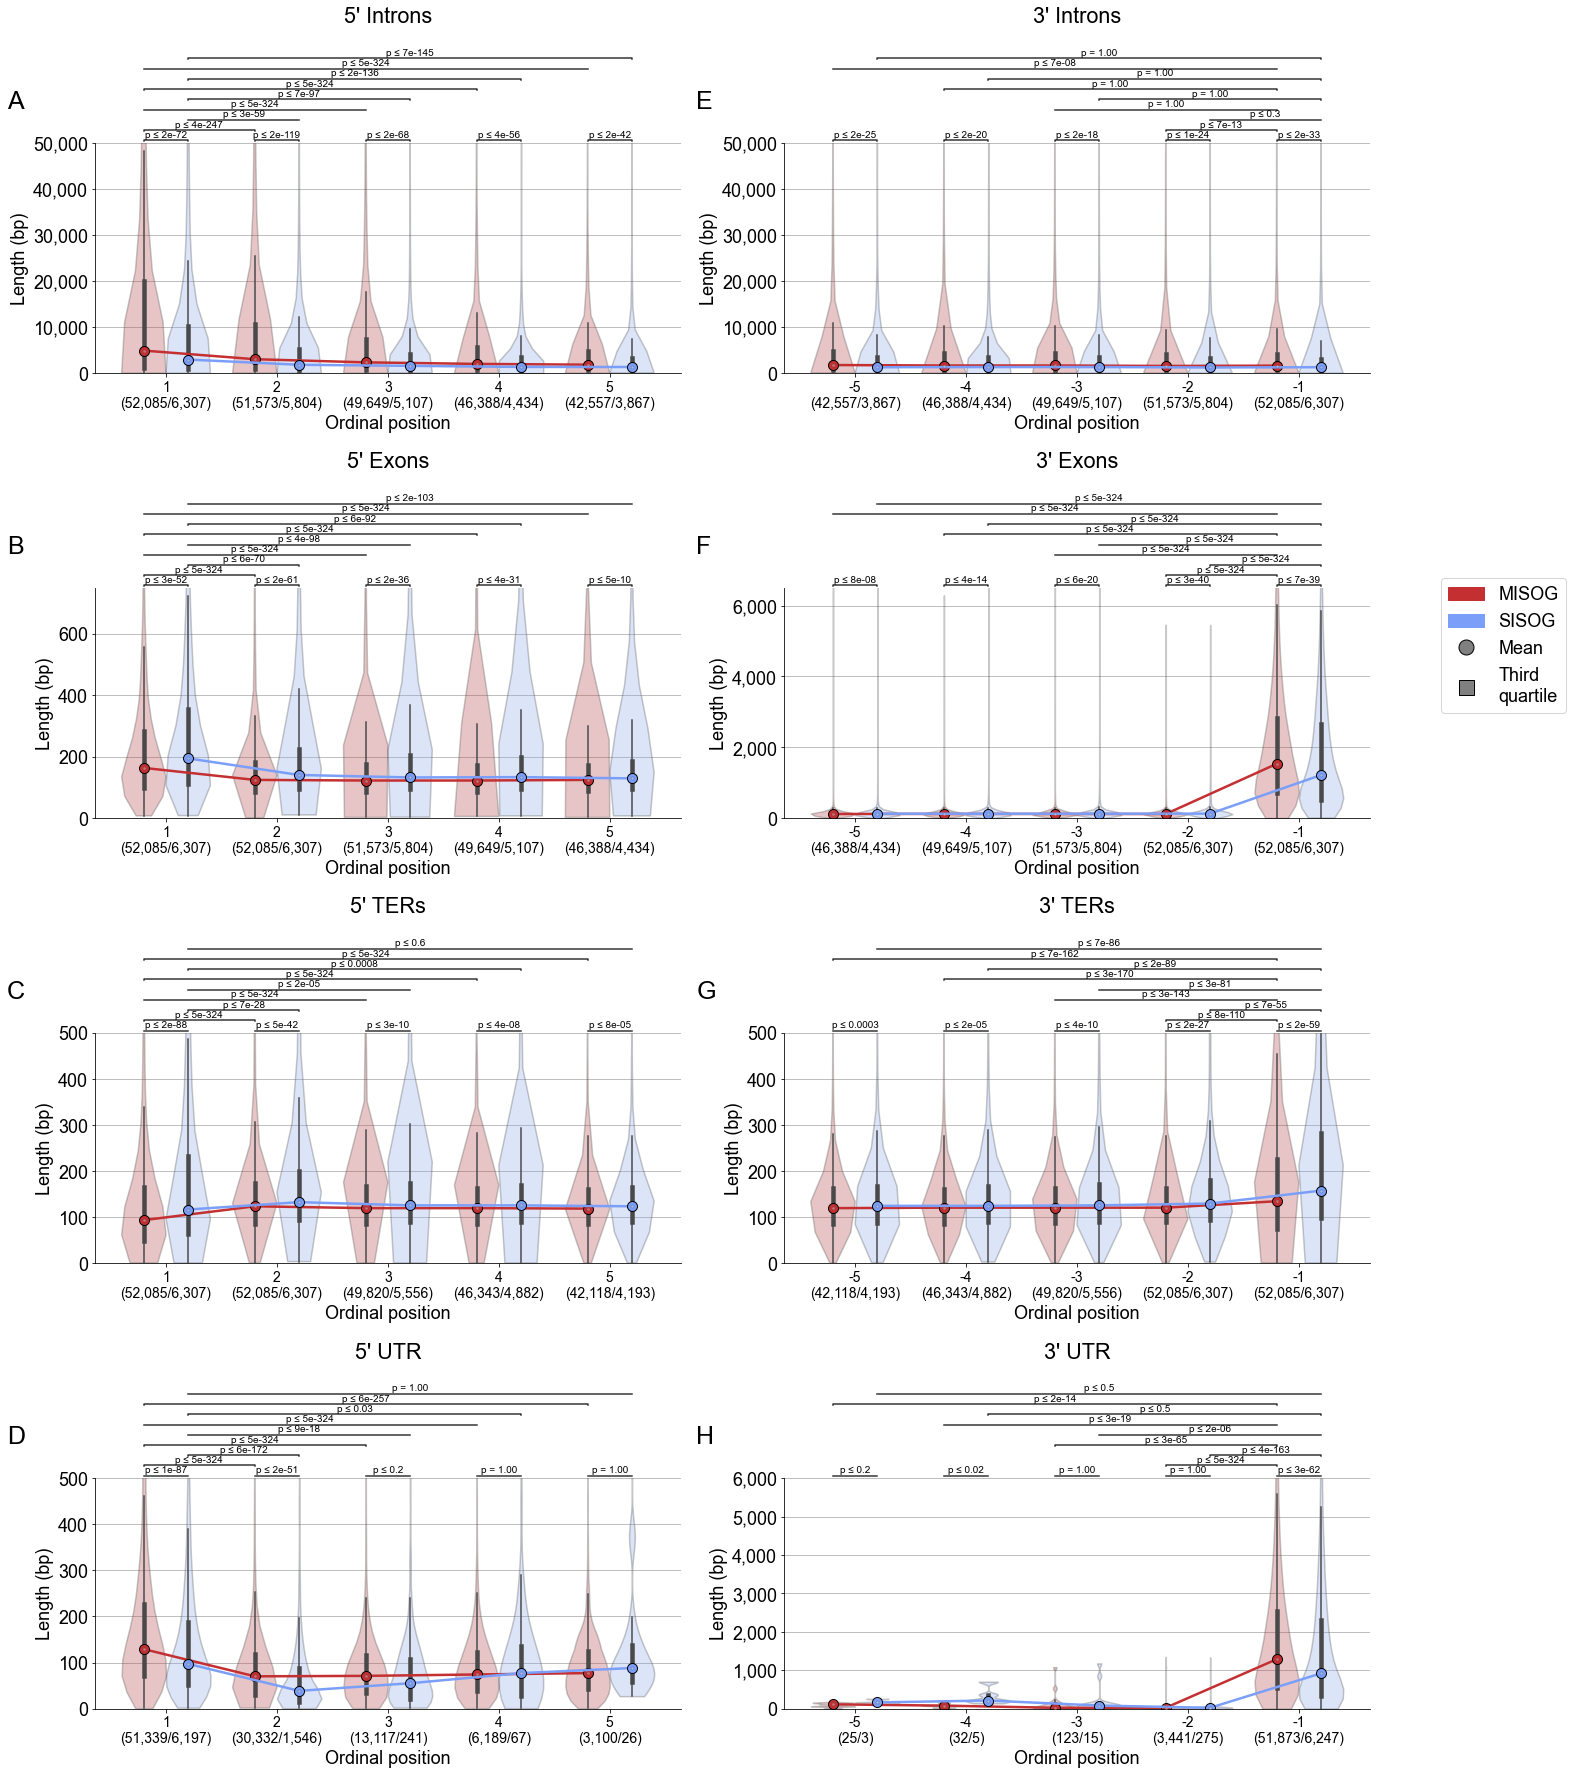

In [90]:
f, ax = plt.subplots(nrows=4, ncols=2, figsize=(22,25))
palette={'Miso' : '#C43032FF', 'Siso' : '#7B9FF9FF', }
box_pairs = [
    ((e,'Miso'),(e,'Siso')) for e in range(1,6)
]

box_pairs = box_pairs + [((1,'Miso'),(e,'Miso')) for e in range(2,6)] + [((1,'Siso'),(e,'Siso')) for e in range(2,6)]

print(box_pairs)

k_limit = 5
zscore_cutoff = 2
padding_title = 120

concat_cds_exons['Nb_exon_relative'] = concat_cds_exons['Nb_exon_relative'].fillna(0)
concat_introns['Nb_exon_relative'] = concat_introns['Nb_exon_relative'].fillna(0)
concat_cds_exons[['Nb_exon_relative', 'Nb_exon', 'Nb_exon_inverted']] = concat_cds_exons[['Nb_exon_relative', 'Nb_exon', 'Nb_exon_inverted']].astype(int)
concat_introns[['Nb_exon_relative', 'Nb_exon', 'Nb_exon_inverted']] = concat_introns[['Nb_exon_relative', 'Nb_exon', 'Nb_exon_inverted']].astype(int)

utrs = concat_cds_exons.dropna(subset=['UTR_bool']).reset_index(drop=True)
utrs[['UTR_Start', 'UTR_End']] = utrs.UTR_ranges.str.split('-', expand=True)
utrs[['UTR_Start', 'UTR_End']] = utrs[['UTR_Start', 'UTR_End']].astype(int)
utrs['UTR_Length'] = utrs['UTR_End'] - utrs['UTR_Start']


custom_boxplot(data=concat_cds_exons.loc[(concat_cds_exons['Type'] == 'exon') & (concat_cds_exons['Nb_exon'] <= 5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon', 'Length']].drop_duplicates(), x='Nb_exon', y='Length', hue='Miso_siso', ax=ax[1][0], ylim=(0,750), xlabel='Ordinal position', palette=palette, title="5' Exons", box_pairs=box_pairs, padding_title=padding_title)
custom_boxplot(data=concat_cds_exons.loc[(concat_cds_exons['Type'] == 'CDS') & (concat_cds_exons['Nb_exon'] <= 5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon', 'Length']].drop_duplicates(), x='Nb_exon', y='Length', hue='Miso_siso', xlabel='Ordinal position', ax=ax[2][0], ylim=(0,500), palette={'Miso' : '#C43032FF', 'Siso' : '#7B9FF9FF', }, title="5' TERs", box_pairs=box_pairs, padding_title=padding_title)
custom_boxplot(data=concat_introns.loc[(concat_introns['Type'] == 'exon') & (concat_introns['Nb_exon'] <= 5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon', 'Intron_Length']].drop_duplicates(), x='Nb_exon', y='Intron_Length', hue='Miso_siso', ax=ax[0][0], xlabel='Ordinal position', ylim=(0,5e4), palette={'Miso' : '#C43032FF', 'Siso' : '#7B9FF9FF', }, title="5' Introns", box_pairs=box_pairs, padding_title=padding_title)
custom_boxplot(data=utrs.loc[(utrs['UTR_bool'] == '5_prime') & (utrs['Nb_exon'] <= 5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon', 'UTR_Length']].drop_duplicates(), x='Nb_exon', y='UTR_Length', hue='Miso_siso', ax=ax[3][0], xlabel='Ordinal position', ylim=(0,500), palette={'Miso' : '#C43032FF', 'Siso' : '#7B9FF9FF', }, title="5' UTR", box_pairs=box_pairs, padding_title=padding_title)


box_pairs = [
    ((e,'Miso'),(e,'Siso')) for e in list(range(-5,0))
]
box_pairs = box_pairs + [((-1,'Miso'),(e,'Miso')) for e in range(-5,-1)] + [((-1,'Siso'),(e,'Siso')) for e in range(-5,-1)]

custom_boxplot(data=concat_cds_exons.loc[(concat_cds_exons['Type'] == 'exon')  & (concat_cds_exons['Nb_exon_inverted'] >= -5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon_inverted', 'Length']].drop_duplicates(), x='Nb_exon_inverted', y='Length', hue='Miso_siso',xlabel='Ordinal position', ax=ax[1][1], ylim=(0,6.5e3), palette=palette, title="3' Exons", box_pairs=box_pairs, padding_title=padding_title, legend=True, x_legend=1.35,)
custom_boxplot(data=concat_cds_exons.loc[(concat_cds_exons['Type'] == 'CDS') & (concat_cds_exons['Nb_exon_inverted'] >= -5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon_inverted', 'Length']].drop_duplicates(), x='Nb_exon_inverted', y='Length', hue='Miso_siso', xlabel='Ordinal position',ax=ax[2][1], ylim=(0,500), palette=palette, title="3' TERs", box_pairs=box_pairs, padding_title=padding_title)
custom_boxplot(data=concat_introns.loc[(concat_introns['Type'] == 'exon') & (concat_introns['Nb_exon_inverted'] >= -5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon_inverted', 'Intron_Length']].drop_duplicates(), x='Nb_exon_inverted', y='Intron_Length', hue='Miso_siso',xlabel='Ordinal position', ax=ax[0][1], ylim=(0,50e3), palette=palette, title="3' Introns", box_pairs=box_pairs, padding_title=padding_title, )
custom_boxplot(data=utrs.loc[(utrs['UTR_bool'] == '3_prime') & (utrs['Nb_exon_inverted'] >= -5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon_inverted', 'UTR_Length']].drop_duplicates(), x='Nb_exon_inverted', y='UTR_Length', hue='Miso_siso',  xlabel='Ordinal position',ax=ax[3][1], ylim=(0,6e3), palette=palette, title="3' UTR", box_pairs=box_pairs, padding_title=padding_title)


i = 0
for n, a in enumerate(ax):
    print(a)
    sub_a = a[0]
#     print(sub_a)
    sub_a.text(-0.15, 1.15, string.ascii_uppercase[i], transform=sub_a.transAxes, size=25, weight='bold')
    i += 1
for n, a in enumerate(ax):
    sub_a = a[1]
#     print(sub_a)
    sub_a.text(-0.15, 1.15, string.ascii_uppercase[i], transform=sub_a.transAxes, size=25, weight='bold')
    i += 1

plt.tight_layout()

figure_path = base_dir + yaml['Figures']['FigS1']
f.savefig(figure_path, dpi=600)

# Raw values

In [71]:

stats_ordinal = pd.concat([
    concat_cds_exons.loc[(concat_cds_exons['Type'] == 'exon') & (concat_cds_exons['Nb_exon'] <= 5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon', 'Length']].drop_duplicates().groupby(['Miso_siso', 'Nb_exon'])['Length'].describe(),
    concat_cds_exons.loc[(concat_cds_exons['Type'] == 'CDS') & (concat_cds_exons['Nb_exon'] <= 5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon', 'Length']].drop_duplicates().groupby(['Miso_siso', 'Nb_exon'])['Length'].describe(),
    concat_introns.loc[(concat_introns['Type'] == 'exon') & (concat_introns['Nb_exon'] <= 5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon', 'Intron_Length']].drop_duplicates().groupby(['Miso_siso', 'Nb_exon'])['Intron_Length'].describe(),
    utrs.loc[(utrs['UTR_bool'] == '5_prime') & (utrs['Nb_exon'] <= 5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon', 'UTR_Length']].drop_duplicates().groupby(['Miso_siso', 'Nb_exon'])['UTR_Length'].describe(),
    
]
).T

stats_ordinal.columns = pd.MultiIndex.from_product([['Ordinal position'], ['Exons', 'TER', 'Introns', "5' UTR"], ['M-iso', "S-iso"], [1,2,3,4,5]])
stats_ordinal = stats_ordinal.T


stats_ordinal_inverted =pd.concat([
    concat_cds_exons.loc[(concat_cds_exons['Type'] == 'exon')  & (concat_cds_exons['Nb_exon_inverted'] >= -5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon_inverted', 'Length']].drop_duplicates().groupby(['Miso_siso', 'Nb_exon_inverted'])['Length'].describe(),
    concat_cds_exons.loc[(concat_cds_exons['Type'] == 'CDS') & (concat_cds_exons['Nb_exon_inverted'] >= -5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon_inverted', 'Length']].drop_duplicates().groupby(['Miso_siso', 'Nb_exon_inverted'])['Length'].describe(),
    concat_introns.loc[(concat_introns['Type'] == 'exon') & (concat_introns['Nb_exon_inverted'] >= -5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon_inverted', 'Intron_Length']].drop_duplicates().groupby(['Miso_siso', 'Nb_exon_inverted'])['Intron_Length'].describe(),
    utrs.loc[(utrs['UTR_bool'] == '3_prime') & (utrs['Nb_exon_inverted'] >= -5)][['Gene', 'NM', 'Miso_siso', 'Nb_exon_inverted', 'UTR_Length']].drop_duplicates().groupby(['Miso_siso', 'Nb_exon_inverted'])['UTR_Length'].describe(),
    ]).T

stats_ordinal_inverted.columns = pd.MultiIndex.from_product([['Inverted ordinal position'], ['Exons', 'TER', 'Introns',  "3' UTR"], ['M-iso', "S-iso"], [-5,-4,-3,-2,-1]])
stats_ordinal_inverted = stats_ordinal_inverted.T




stats_ordinal_final = pd.concat([stats_ordinal, stats_ordinal_inverted]).rename({'50%' : 'median'}, axis=1)



# excel_file_path = '/gstock/GeneIso/results/GeneIso.xlsx'
# mode = 'w' if os.path.isfile(excel_file_path) is False else 'a'
# sheet_name = 'Table S3'    

# if mode == 'a':
#     workbook=openpyxl.load_workbook(excel_file_path)
#     l_sheets = workbook.get_sheet_names()
#     if sheet_name in l_sheets:
#         std=workbook.get_sheet_by_name(sheet_name)
#         workbook.remove_sheet(std)

# with pd.ExcelWriter(excel_file_path, mode=mode, engine='openpyxl') as writer:  
# #     df.to_excel(writer, sheet_name='Sheet_name_3')
#     stats_ordinal_final.to_excel(writer, sheet_name=sheet_name)

stats_ordinal_final

count         mean          std  \
Ordinal position          Exons  M-iso  1  52085.0   237.283633   251.261071   
                                        2  52085.0   194.340635   332.040724   
                                        3  51573.0   224.282881   529.922142   
                                        4  49649.0   271.103829   729.503200   
                                        5  46388.0   302.200138   848.529742   
...                                            ...          ...          ...   
Inverted ordinal position 3' UTR S-iso -5      3.0   192.000000    53.693575   
                                       -4      5.0   323.600000   225.293808   
                                       -3     15.0   195.133333   340.000602   
                                       -2    275.0    33.094545    86.057728   
                                       -1   6247.0  1649.386265  2010.889931   

                                             min    25%  median     75%  \
Ordinal position          Exons  M-iso  1    8.0  100.0   164.0   283.0   
                                        2    2.0   85.0   125.0   184.0   
                                        3    3.0   85.0   123.0   177.0   
                                        4    6.0   87.0   123.0   175.0   
                                        5    3.0   90.0   125.0   174.0   
...                                          ...    ...     ...     ...   
Inverted ordinal position 3' UTR S-iso -5  161.0  161.0   161.0   207.5   
                                       -4  137.0  210.0   210.0   362.0   
                                       -3    3.0   47.5    79.0   105.5   
                                       -2    1.0    9.0    21.0    36.0   
                                       -1    1.0  324.0   918.0  2296.5   

                                               max  
Ordinal position          Exons  M-iso  1   6290.0  
                                        2  13672.0  
                                        3  23264.0  
                                        4  30081.0  
                                        5  24927.0  
...                                            ...  
Inverted ordinal position 3' UTR S-iso -5    254.0  
                                       -4    699.0  
                                       -3   1176.0  
                                       -2   1332.0  
                                       -1  25445.0  

[100 rows x 8 columns]

In [59]:
pd.concat(
    [
        refseq_exons.drop_duplicates(subset=['Gene', 'Start', 'End']).groupby(['Miso_siso', 'Gene'])['Start'].count().rename('Exons count'),
        refseq_exons.drop_duplicates(subset=['Gene', 'Start', 'End'])[['Miso_siso','Gene','Length']].groupby(['Miso_siso', 'Gene'])['Length'].median().rename('median Exon length'),
        refseq_cds.drop_duplicates(subset=['Gene', 'Start', 'End']).groupby(['Miso_siso', 'Gene'])['Start'].count().rename('TER count'),
        refseq_cds.drop_duplicates(subset=['Gene', 'Start', 'End'])[['Miso_siso','Gene','Length']].groupby(['Miso_siso', 'Gene'])['Length'].median().rename('median TER length'),
        refseq_exons_introns_exploded_clean[['Miso_siso', 'Gene', 'Intron_Length', 'Intron_Start', 'Intron_End']].drop_duplicates(subset=['Gene', 'Intron_Start', 'Intron_Length']).groupby(['Miso_siso', 'Gene'])['Intron_Length'].median().rename('median intron length'),
        
    ], axis=1
)

Exons count  median Exon length  TER count  \
Miso_siso Gene                                                 
Miso      A1CF           16.0               143.5         13   
          A2M            39.0               122.0         38   
          A2ML1          37.0               127.0         36   
          A4GALT          NaN                 NaN          1   
          AAAS           16.0                93.0         16   
...                       ...                 ...        ...   
Siso      ZW10           16.0               156.5         16   
          ZXDA            NaN                 NaN          1   
          ZXDB            NaN                 NaN          1   
          ZYG11B         14.0               151.5         14   
          ZZEF1          55.0               151.0         55   

                  median TER length  
Miso_siso Gene                       
Miso      A1CF                148.0  
          A2M                 117.0  
          A2ML1               117.5  
          A4GALT             1061.0  
          AAAS                 92.0  
...                             ...  
Siso      ZW10                143.0  
          ZXDA               2399.0  
          ZXDB               2411.0  
          ZYG11B              119.5  
          ZZEF1               148.0  

[19285 rows x 4 columns]

# Prepare Fig S2 values for 5' & 3' distance to START/STOP

In [16]:
def get_total_length_utr(df):
    if df.Strand.values[0] == "+":
        strand = "+"
        ascending=True
        reverse=False
        df = df.sort_values(by=['Start', 'End'])
        first_nt_cds = df.loc[df['Type'] == 'CDS'].Start.values[0]
        last_nt_cds = df.loc[df['Type'] == 'CDS'].End.values[-1]
        first_nt_exon = df.loc[df['Type'] == 'exon'].Start.values[0]
        last_nt_exon = df.loc[df['Type'] == 'exon'].End.values[-1]
        complete_five_utr_length = first_nt_cds - first_nt_exon
        complete_three_utr_length = last_nt_exon - last_nt_cds
    elif df.Strand.values[0] == "-":
        strand = "-"
        ascending=False
        reverse=True
        df = df.sort_values(by=['Start', 'End'], ascending=ascending)
        first_nt_cds = df.loc[df['Type'] == 'CDS'].End.values[0]
        last_nt_cds = df.loc[df['Type'] == 'CDS'].Start.values[-1]
        first_nt_exon = df.loc[df['Type'] == 'exon'].End.values[0]
        last_nt_exon = df.loc[df['Type'] == 'exon'].Start.values[-1]
        complete_five_utr_length = first_nt_exon - first_nt_cds
        complete_three_utr_length = last_nt_cds - last_nt_exon

    df['Complete_5_prime_UTR_length'] = complete_five_utr_length
    df['Complete_3_prime_UTR_length'] = complete_three_utr_length
    return df

concat_cds_exons_first = concat_cds_exons[(concat_cds_exons['Nb_exon'] == 1) | (concat_cds_exons['Nb_exon_inverted'] == -1)]
concat_cds_exons_utr_length = concat_cds_exons_first.groupby(['Gene', 'NM']).progress_apply(lambda df: get_total_length_utr(df)).drop_duplicates()
concat_cds_exons_utr_length

100%|██████████| 58392/58392 [17:47<00:00, 54.68it/s] 


NC RefSeq_validation  Type     Start  \
Gene NM                                                                       
A1BG NM_130786.4    0        NC_000019.10        BestRefSeq  exon  58353404   
                    1        NC_000019.10        BestRefSeq   CDS  58353404   
                    14       NC_000019.10        BestRefSeq   CDS  58347022   
                    15       NC_000019.10        BestRefSeq  exon  58345183   
A1CF NM_001198818.2 16       NC_000010.11        BestRefSeq  exon  50885581   
...                                   ...               ...   ...       ...   
ZZZ3 NM_001376156.1 1403971  NC_000001.11        BestRefSeq  exon  77562416   
     NM_015534.6    1403972  NC_000001.11        BestRefSeq  exon  77682585   
                    1403977  NC_000001.11        BestRefSeq   CDS  77631850   
                    1403996  NC_000001.11        BestRefSeq   CDS  77565640   
                    1403997  NC_000001.11        BestRefSeq  exon  77562416   

                                  End Score Strand Phase  \
Gene NM                                                    
A1BG NM_130786.4    0        58353492     .      -     .   
                    1        58353437     .      -     0   
                    14       58347029     .      -     2   
                    15       58347029     .      -     .   
A1CF NM_001198818.2 16       50885627     .      -     .   
...                               ...   ...    ...   ...   
ZZZ3 NM_001376156.1 1403971  77565784     .      -     .   
     NM_015534.6    1403972  77682658     .      -     .   
                    1403977  77633354     .      -     0   
                    1403996  77565784     .      -     1   
                    1403997  77565784     .      -     .   

                                                                    Attributes  \
Gene NM                                                                          
A1BG NM_130786.4    0        ID=exon-NM_130786.4-1;Parent=rna-NM_130786.4;D...   
                    1        ID=cds-NP_570602.2;Parent=rna-NM_130786.4;Dbxr...   
                    14       ID=cds-NP_570602.2;Parent=rna-NM_130786.4;Dbxr...   
                    15       ID=exon-NM_130786.4-8;Parent=rna-NM_130786.4;D...   
A1CF NM_001198818.2 16       ID=exon-NM_001198818.2-1;Parent=rna-NM_0011988...   
...                                                                        ...   
ZZZ3 NM_001376156.1 1403971  ID=exon-NM_001376156.1-14;Parent=rna-NM_001376...   
     NM_015534.6    1403972  ID=exon-NM_015534.6-1;Parent=rna-NM_015534.6;D...   
                    1403977  ID=cds-NP_056349.1;Parent=rna-NM_015534.6;Dbxr...   
                    1403996  ID=cds-NP_056349.1;Parent=rna-NM_015534.6;Dbxr...   
                    1403997  ID=exon-NM_015534.6-15;Parent=rna-NM_015534.6;...   

                             Length  ...             ranges  \
Gene NM                              ...                      
A1BG NM_130786.4    0            89  ...  58353404-58353492   
                    1            34  ...  58353404-58353437   
                    14            8  ...  58347022-58347029   
                    15         1847  ...  58345183-58347029   
A1CF NM_001198818.2 16           47  ...  50885581-50885627   
...                             ...  ...                ...   
ZZZ3 NM_001376156.1 1403971    3369  ...  77562416-77565784   
     NM_015534.6    1403972      74  ...  77682585-77682658   
                    1403977    1505  ...  77631850-77633354   
                    1403996     145  ...  77565640-77565784   
                    1403997    3369  ...  77562416-77565784   

                                    UTR_ranges Shared_5_prime Shared_3_prime  \
Gene NM                                                                        
A1BG NM_130786.4    0        58353438-58353492           True          False   
                    1                     None          False          False   
                    14 

# Fig 2

Miso v.s. Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=2.202e+08
Miso v.s. Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.096e-11 U_stat=1.656e+08
Miso v.s. Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=2.085e+08
Miso v.s. Siso: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.765e-63 U_stat=1.831e+08
                                         count          mean           std  \
Miso_siso variable                                                           
Miso      Complete_3_prime_UTR_length  52085.0   2248.249227   4001.729228   
          Complete_5_prime_UTR_length  52085.0  19124.569511  54099.511747   
Siso      Complete_3_prime_UTR_length   6307.0   1825.381005   3350.255446   
          Complete_5_prime_UTR_length   6307.0   3575.206279  15475.871598   

                                       min    25%     50%      75%        m

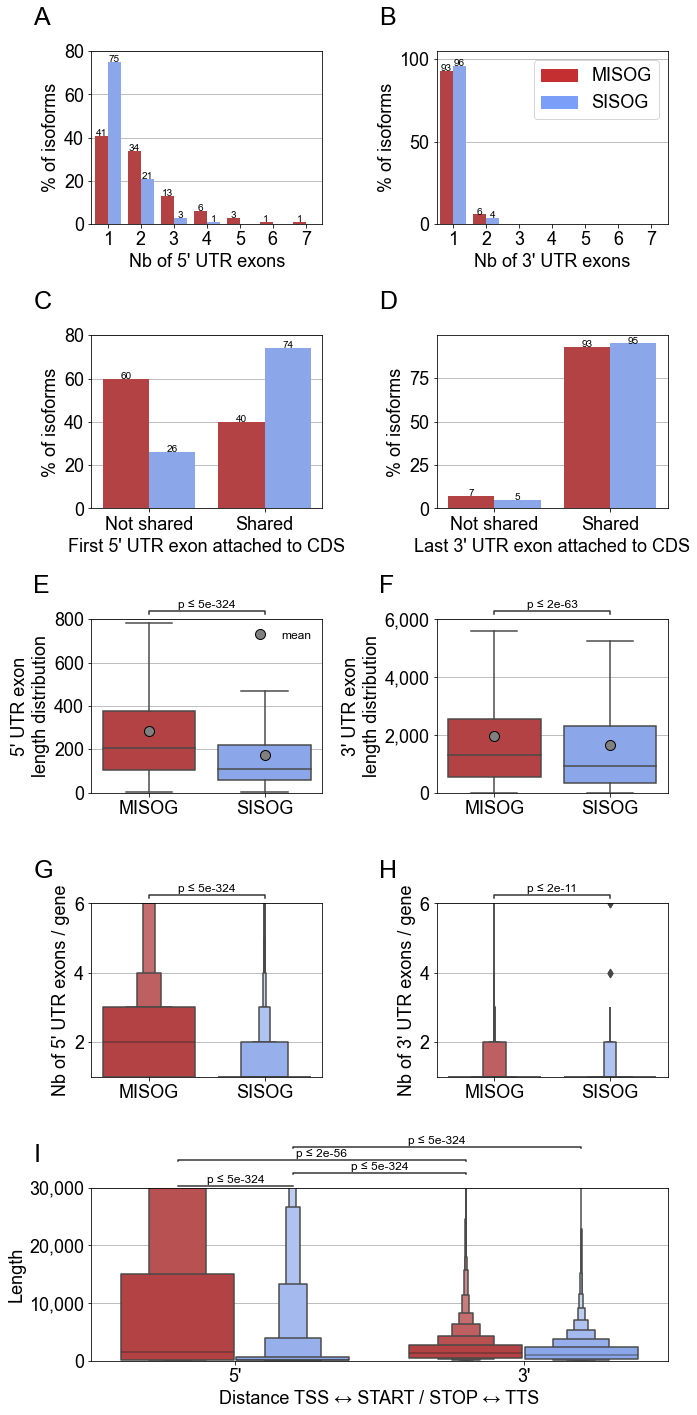

In [86]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            if np.isnan(p.get_height()) == False and p.get_height() > 0.4:
                value = '{:0}'.format(int(p.get_height()))
                ax.text(_x, _y, value, ha="center", fontsize=10) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

fig = plt.figure(figsize=(10, 20)) 
gs = matplotlib.gridspec.GridSpec(5, 2, width_ratios=[1, 1]) 
ax00 = plt.subplot(gs[0,0])
ax01 = plt.subplot(gs[0,1])
ax10 = plt.subplot(gs[3,0])
ax11 = plt.subplot(gs[3,1])
ax20 = plt.subplot(gs[2,0])
ax21 = plt.subplot(gs[2,1])
ax3 = plt.subplot(gs[4,0:])
ax40 =  plt.subplot(gs[1,0])
ax41 =  plt.subplot(gs[1,1])



data_5_prime = 100 * ( concat_cds_exons.loc[concat_cds_exons['UTR_bool'] == '5_prime'].reset_index(drop=True).groupby(['Miso_siso', 'Gene', 'NM'])['ranges'].count().reset_index().groupby('Miso_siso')['ranges'].value_counts() / concat_cds_exons.loc[concat_cds_exons['UTR_bool'] == '5_prime'].reset_index(drop=True).groupby(['Miso_siso', 'Gene', 'NM'])['ranges'].count().reset_index().groupby('Miso_siso')['ranges'].value_counts().groupby('Miso_siso').sum())
data_5_prime = data_5_prime.rename('count').reset_index()
data_5_prime = data_5_prime.loc[data_5_prime['ranges'] <= 7]
data_5_prime = data_5_prime.round()
data_3_prime = 100 * ( concat_cds_exons.loc[concat_cds_exons['UTR_bool'] == '3_prime'].reset_index(drop=True).groupby(['Miso_siso', 'Gene', 'NM'])['ranges'].count().reset_index().groupby('Miso_siso')['ranges'].value_counts() / concat_cds_exons.loc[concat_cds_exons['UTR_bool'] == '3_prime'].reset_index(drop=True).groupby(['Miso_siso', 'Gene', 'NM'])['ranges'].count().reset_index().groupby('Miso_siso')['ranges'].value_counts().groupby('Miso_siso').sum())
data_3_prime = data_3_prime.rename('count').reset_index()
data_3_prime = data_3_prime.loc[data_3_prime['ranges'] <= 7]
data_3_prime = data_3_prime.round()
data_length_utr = utrs.groupby(['Miso_siso', 'Gene', 'NM', 'UTR_bool'])['UTR_Length'].sum().sort_index().reset_index()


sns.barplot(data=data_5_prime, x='ranges', y='count', hue='Miso_siso', palette=palette, ax=ax00)
sns.barplot(data=data_3_prime, x='ranges', y='count', hue='Miso_siso', palette=palette, ax=ax01)
sns.boxenplot(data=concat_cds_exons.loc[concat_cds_exons['UTR_bool'] == '5_prime'].reset_index(drop=True).groupby(['Miso_siso', 'Gene', 'NM'])['ranges'].count().reset_index(), x='Miso_siso', y='ranges',  palette=palette, ax=ax10)
sns.boxenplot(data=concat_cds_exons.loc[concat_cds_exons['UTR_bool'] == '3_prime'].reset_index(drop=True).groupby(['Miso_siso', 'Gene', 'NM'])['ranges'].count().reset_index(), x='Miso_siso', y='ranges',  palette=palette, ax=ax11)
sns.boxplot(data=data_length_utr.loc[data_length_utr['UTR_bool'] == '5_prime'], x='Miso_siso', y='UTR_Length', showfliers=False, palette=palette, ax=ax20,
           showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black", "markersize" : 10})
sns.boxplot(data=data_length_utr.loc[data_length_utr['UTR_bool'] == '3_prime'], x='Miso_siso', y='UTR_Length',  showfliers=False, palette=palette, ax=ax21,
           showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black", "markersize" : 10})


# print(data_length_utr.loc[data_length_utr['UTR_bool'] == '5_prime'].groupby(['Miso_siso', 'variable'])['value'].describe())


show_values_on_bars(ax00)
show_values_on_bars(ax01)

# ax00.set_xlim(xmax=5.5)

ax00.set_ylim(ymax=80)
ax01.set_ylim(ymax=105)
ax00.set_ylabel("% of isoforms")
ax00.set_xlabel("Nb of 5' UTR exons")
ax01.set_ylabel("% of isoforms")
ax01.set_xlabel("Nb of 3' UTR exons")
# ax00.legend(loc='upper right', handles = [mpatches.Patch(color=palette['Miso']), mpatches.Patch(color=palette['Siso'])], labels=['M-iso', 'S-iso'])
ax01.legend(loc='upper right', handles = [mpatches.Patch(color=palette['Miso']), mpatches.Patch(color=palette['Siso'])], labels=['MISOG', 'SISOG'])
ax20.legend(loc='upper right', handles = [matplotlib.lines.Line2D([0], [0], marker='o', color='w', label='Circle', markerfacecolor='grey', markeredgecolor='black', markersize=10)], labels=['mean'], frameon=False, fontsize=12)
# ax00.legend(loc='upper right', handles = [mpatches.Patch(color=palette['Miso']), mpatches.Patch(color=palette['Siso'])], labels=['M-iso', 'S-iso'])
# plt.legend(loc='upper center', handles = [mpatches.Patch(color=palette['Miso']), mpatches.Patch(color=palette['Siso'])], labels=['M-iso', 'S-iso'])

ax10.set_xlabel("")
ax10.set_xticklabels(['MISOG', 'SISOG'])
ax10.set_ylabel("Nb of 5' UTR exons / gene")
ax11.set_ylabel("Nb of 3' UTR exons / gene")
ax11.set_xticklabels(['MISOG', 'SISOG'])
ax20.set_ylabel("5' UTR exon\nlength distribution")
ax21.set_ylabel("3' UTR exon\nlength distribution")
ax11.set_xlabel("")
ax20.set_xlabel("")
ax21.set_xlabel("")
ax20.set_xticklabels(['MISOG', 'SISOG'])
ax21.set_xticklabels(['MISOG', 'SISOG'])

ax00.legend().remove()
# ax01.legend(title='', loc='upper right')
ax10.legend().remove()
ax11.legend().remove()
ax10.set_ylim(ymin=1, ymax=6)
ax11.set_ylim(ymin=1, ymax=6)
ax20.set_ylim(ymin=0, ymax=800)
ax21.set_ylim(ymin=0, ymax=0.6e4)

l_axes = [ax00, ax01, ax40, ax41, ax20, ax21, ax10, ax11,   ax3]

for sub_ax in l_axes:
    sub_ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

box_pairs = [((e, 'Miso'), (e, 'Siso')) for e in range(1,7)]

# add_stat_annotation(ax[0][0], data=data_5_prime.rename('count').reset_index(), x='ranges', y='count', hue='Miso_siso', fontsize=12,box_pairs=box_pairs, test='Mann-Whitney', text_format='simple', loc='outside', pvalue_thresholds=pvalues_cutoff)
# add_stat_annotation(ax[0][1], data=data_3_prime.rename('count').reset_index(), x='ranges', y='count', hue='Miso_siso', fontsize=12,box_pairs=box_pairs, test='Mann-Whitney', text_format='simple', loc='outside', pvalue_thresholds=pvalues_cutoff)
add_stat_annotation(ax10, data=concat_cds_exons.loc[concat_cds_exons['UTR_bool'] == '5_prime'].reset_index(drop=True).groupby(['Miso_siso', 'Gene', 'NM'])['ranges'].count().reset_index(), x='Miso_siso', y='ranges', fontsize=12,box_pairs=[('Miso', 'Siso')], test='Mann-Whitney', text_format='simple', loc='outside', pvalue_thresholds=pvalues_cutoff)
add_stat_annotation(ax11, data=concat_cds_exons.loc[concat_cds_exons['UTR_bool'] == '3_prime'].reset_index(drop=True).groupby(['Miso_siso', 'Gene', 'NM'])['ranges'].count().reset_index(), x='Miso_siso', y='ranges', fontsize=12,box_pairs=[('Miso', 'Siso')], test='Mann-Whitney', text_format='simple', loc='outside', pvalue_thresholds=pvalues_cutoff)
add_stat_annotation(ax20, data=data_length_utr.loc[data_length_utr['UTR_bool'] == '5_prime'], x='Miso_siso', y='UTR_Length', box_pairs=[('Miso', 'Siso')], test='Mann-Whitney', text_format='simple',fontsize=12, loc='outside', pvalue_thresholds=pvalues_cutoff)
add_stat_annotation(ax21, data=data_length_utr.loc[data_length_utr['UTR_bool'] == '3_prime'], x='Miso_siso', y='UTR_Length', box_pairs=[('Miso', 'Siso')], test='Mann-Whitney', text_format='simple',fontsize=12, loc='outside', pvalue_thresholds=pvalues_cutoff)


i = 0
for n, sub_a in enumerate(l_axes[:-1]):
    sub_a.text(-0.25, 1.15, string.ascii_uppercase[i], transform=sub_a.transAxes, size=25, weight='bold')
    i += 1


plt.tight_layout()
# data



data = concat_cds_exons_utr_length[['Gene', 'NM', 'Miso_siso', 'Complete_5_prime_UTR_length', 'Complete_3_prime_UTR_length']].drop_duplicates().melt(id_vars=['Gene', 'NM', 'Miso_siso',], value_vars=['Complete_5_prime_UTR_length', 'Complete_3_prime_UTR_length']).sort_values(by=['Miso_siso'])
data
# data = data.loc[data['value'] < (data.value.mean() + data.value.std()*2)]


x, y, hue = 'variable', 'value', 'Miso_siso'
print(data.groupby(['Miso_siso', 'variable'])['value'].describe())
sns.boxenplot(data=data, x='variable', y='value', hue='Miso_siso', showfliers=True, palette=palette, ax=ax3)
ax3.set_xticklabels(["5'", "3'"])
ax3.set_xlabel('Distance TSS ↔ START / STOP ↔ TTS')
ax3.set_ylabel('Length')
ax3.legend().remove()
box_pairs = [
    (('Complete_5_prime_UTR_length', 'Miso'), ('Complete_5_prime_UTR_length', 'Siso')),
    (('Complete_3_prime_UTR_length', 'Miso'), ('Complete_5_prime_UTR_length', 'Siso')),
    (('Complete_5_prime_UTR_length', 'Miso'), ('Complete_3_prime_UTR_length', 'Miso')),
    (('Complete_5_prime_UTR_length', 'Siso'), ('Complete_3_prime_UTR_length', 'Siso')),
]
ax3.set_ylim(0,0.3e5)
add_stat_annotation(ax3, data=data, x='variable', y='value', hue='Miso_siso', box_pairs=box_pairs, test='Mann-Whitney', text_format='simple', loc='outside', pvalue_thresholds=pvalues_cutoff, fontsize=12, line_height=0.005, line_offset=0.006,)



ax3.text(-0.1, 1.15, string.ascii_uppercase[i], transform=ax3.transAxes, size=25, weight='bold')

data_shared = 100 * (concat_cds_exons.loc[(concat_cds_exons['UTR_bool'] == '5_prime') & (concat_cds_exons['Nb_exon'] == 1)].groupby(['Miso_siso'])['Shared_5_prime'].value_counts() / concat_cds_exons.loc[(concat_cds_exons['UTR_bool'] == '5_prime') & (concat_cds_exons['Nb_exon'] == 1)].groupby(['Miso_siso'])['Shared_5_prime'].value_counts().groupby('Miso_siso').sum())
data_shared = data_shared.rename('count').reset_index()
data_shared = data_shared.round()
sns.barplot(data=data_shared, x='Shared_5_prime', y='count', hue='Miso_siso', palette=palette, ax=ax40)
ax40.set_ylim(ymax=80)
ax40.legend().remove()
ax40.set_ylabel('% of isoforms')
ax40.set_xlabel("First 5' UTR exon attached to CDS")
ax40.set_xticklabels(['Not shared', 'Shared'])
show_values_on_bars(ax40)


data_shared = 100 * (concat_cds_exons.loc[(concat_cds_exons['UTR_bool'] == '3_prime') & (concat_cds_exons['Nb_exon_inverted'] == -1)].groupby(['Miso_siso'])['Shared_3_prime'].value_counts() / concat_cds_exons.loc[(concat_cds_exons['UTR_bool'] == '3_prime') & (concat_cds_exons['Nb_exon_inverted'] == -1)].groupby(['Miso_siso'])['Shared_3_prime'].value_counts().groupby('Miso_siso').sum())
data_shared = data_shared.rename('count').reset_index()
data_shared = data_shared.round()
sns.barplot(data=data_shared, x='Shared_3_prime', y='count', hue='Miso_siso', palette=palette, ax=ax41)
ax41.legend().remove()
ax41.set_ylabel('% of isoforms')
ax41.set_xlabel("Last 3' UTR exon attached to CDS")
ax41.set_xticklabels(['Not shared', 'Shared'])
show_values_on_bars(ax41)


for ax in l_axes:
    ax.grid(axis='y')
    ax.set_axisbelow(True)

plt.tight_layout()

figure_path = base_dir + yaml['Figures']['Fig2']
fig.savefig(figure_path, dpi=600)

# Raw values


In [155]:

data_length_utr.groupby(['Miso_siso', 'UTR_bool'])['UTR_Length'].describe()


count         mean          std  min    25%     50%  \
Miso_siso UTR_bool                                                          
Miso      3_prime   51873.0  1953.453164  2225.212798  1.0  528.0  1287.0   
          5_prime   51339.0   285.935897   279.844751  1.0  102.0   204.0   
Siso      3_prime    6247.0  1651.711862  2011.597821  1.0  327.0   920.0   
          5_prime    6197.0   174.814265   201.367135  2.0   57.0   111.0   

                       75%      max  
Miso_siso UTR_bool                   
Miso      3_prime   2548.0  35525.0  
          5_prime    375.0   4703.0  
Siso      3_prime   2296.5  25445.0  
          5_prime    221.0   3559.0

In [273]:
data_53_prime_concat = pd.concat(
    [
        data_5_prime.pivot(columns=['Miso_siso'], index='ranges', values='count'),
        data_3_prime.pivot(columns=['Miso_siso'], index='ranges', values='count'),
    ]
    ,axis=1
)
data_53_prime_concat = data_53_prime_concat.rename({'Miso' : 'M-iso', 'Siso' : 'S-iso'}, axis=1)
data_53_prime_concat.index.name = 'UTR exons number'
data_53_prime_concat.columns = pd.MultiIndex.from_product([["5'", "3'"], ['M-iso', 'S-iso']])
data_53_prime_concat

5'          3'      
                 M-iso S-iso M-iso S-iso
UTR exons number                        
1                41.00 75.00 93.00 96.00
2                34.00 21.00  6.00  4.00
3                13.00  3.00  0.00  0.00
4                 6.00  1.00  0.00  0.00
5                 3.00  0.00  0.00   nan
6                 1.00  0.00  0.00  0.00
7                 1.00  0.00  0.00   nan
8                 0.00  0.00  0.00   nan

# Fig S2

[(-1, -2), (-2, -3), (-3, -4), (-4, -5), (-1, -3), (-1, -4), (-1, -5)]
1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.612e-36 U_stat=7.324e+07
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.672e-100 U_stat=1.442e+08
3 v.s. 4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.529e-57 U_stat=1.804e+08
4 v.s. 5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.687e-38 U_stat=1.807e+08
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.881e-202 U_stat=7.421e+07
1 v.s. 4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=6.892e+07
1 v.s. 5: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=6.041e+07
-2 v.s. -1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=0.000e+00 U_stat=1.657e+08
-3 v.s. -2: Mann-Whitney-Wilcoxon test two-sided with Bonferr

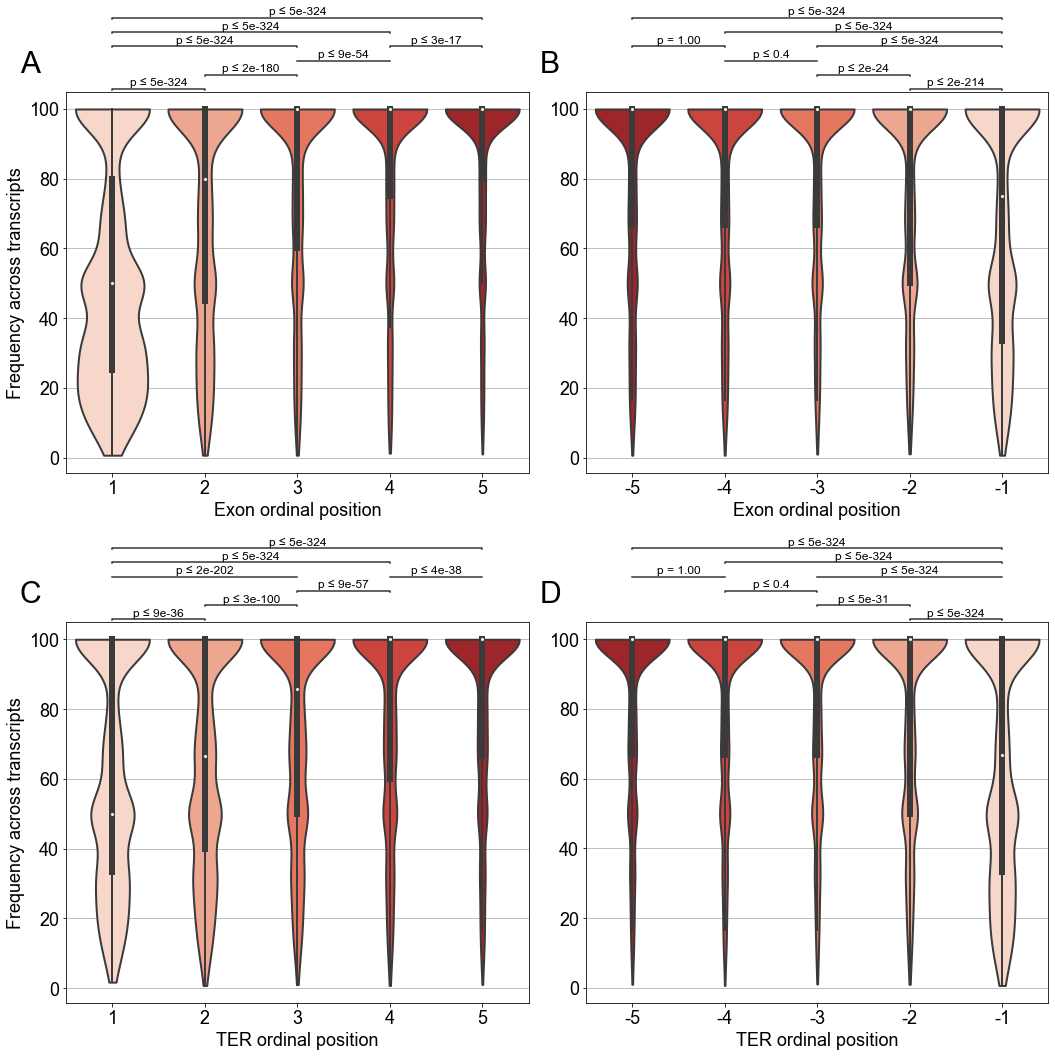

In [89]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))

cds_freq = 100 * (refseq_cds.groupby('Gene')['ranges'].value_counts() / refseq_cds.groupby('Gene')['NM'].nunique())
cds_freq = cds_freq.rename('CDS_freq').reset_index()
cds_freq = pd.merge(concat_cds_exons.loc[concat_cds_exons['Type'] == 'CDS'], cds_freq, on=['Gene', 'ranges'])[['Miso_siso', 'Gene', 'Strand', 'ranges', 'Nb_exon_relative', 'CDS_freq']].drop_duplicates()
cds_freq = cds_freq.loc[cds_freq['Miso_siso'] == 'Miso']

cds_freq_inverted = 100 * (refseq_cds.groupby('Gene')['ranges'].value_counts() / refseq_cds.groupby('Gene')['NM'].nunique())
cds_freq_inverted = cds_freq_inverted.rename('CDS_freq').reset_index()
cds_freq_inverted = pd.merge(concat_cds_exons.loc[concat_cds_exons['Type'] == 'CDS'], cds_freq_inverted, on=['Gene', 'ranges'])[['Miso_siso', 'Gene', 'Strand', 'ranges', 'Nb_exon_inverted', 'CDS_freq']].drop_duplicates()
cds_freq_inverted = cds_freq_inverted.loc[cds_freq_inverted['Miso_siso'] == 'Miso']

exon_freq = 100 * (refseq_exons.groupby('Gene')['ranges'].value_counts() / refseq_exons.groupby('Gene')['NM'].nunique())
exon_freq = exon_freq.rename('Exon_freq').reset_index()
exon_freq = pd.merge(concat_cds_exons.loc[concat_cds_exons['Type'] == 'exon'], exon_freq, on=['Gene', 'ranges'])[['Miso_siso', 'Gene', 'Strand', 'ranges', 'Nb_exon', 'Exon_freq']].drop_duplicates()
exon_freq = exon_freq.loc[exon_freq['Miso_siso'] == 'Miso']

exon_freq_inverted = 100 * (refseq_exons.groupby('Gene')['ranges'].value_counts() / refseq_exons.groupby('Gene')['NM'].nunique())
exon_freq_inverted = exon_freq_inverted.rename('Exon_freq').reset_index()
exon_freq_inverted = pd.merge(concat_cds_exons.loc[concat_cds_exons['Type'] == 'exon'], exon_freq_inverted, on=['Gene', 'ranges'])[['Miso_siso', 'Gene', 'Strand', 'ranges', 'Nb_exon_inverted', 'Exon_freq']].drop_duplicates()
exon_freq_inverted = exon_freq_inverted.loc[exon_freq_inverted['Miso_siso'] == 'Miso']


cds_freq['Nb_exon_relative'] = cds_freq['Nb_exon_relative'].astype(int)
exon_freq['Nb_exon'] = exon_freq['Nb_exon'].astype(int)
cds_freq_inverted['Nb_exon_inverted'] = cds_freq_inverted['Nb_exon_inverted'].astype(int)
exon_freq_inverted['Nb_exon_inverted'] = exon_freq_inverted['Nb_exon_inverted'].astype(int)

k = 5
bw = 0.2
cut = 0
lw = 2
scale = "width"
line_height=0.002 
line_offset=0.005

lr = list(range(0,k))
box_pairs = [(e + 1, lr[i+1] + 1) for i, e in enumerate(lr) if i < len(lr) - 1]
box_pairs = box_pairs + [(1, lr[i+1] + 1) for i, e in enumerate(lr) if i < len(lr) - 1  and i > 0]
box_pairs_inverted = [(-1 * e[0], -1 * e[1]) for e in box_pairs]
print(box_pairs_inverted)

sns.violinplot(data=cds_freq.loc[(cds_freq['Nb_exon_relative'] <= k) & (cds_freq['Miso_siso'] == 'Miso')], x='Nb_exon_relative', y='CDS_freq', bw=bw, cut=cut,linewidth=lw,scale=scale,  showfliers=False, palette=sns.color_palette('Reds', k), ax=ax[1][0],
#            showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black", "markersize" : 10}
             )

ax[1][0].set_ylabel('Frequency across transcripts')
ax[1][0].set_xlabel('TER ordinal position')
add_stat_annotation(ax[1][0], data=cds_freq.loc[(cds_freq['Nb_exon_relative'] <= k)], x='Nb_exon_relative', y='CDS_freq', fontsize=12, box_pairs=box_pairs, test='Mann-Whitney', text_format='simple', loc='outside', pvalue_thresholds=pvalues_cutoff, line_height=line_height, line_offset=line_offset,)

sns.violinplot(data=cds_freq_inverted.loc[(cds_freq_inverted['Nb_exon_inverted'] >= -k) & (cds_freq_inverted['Miso_siso'] == 'Miso')], x='Nb_exon_inverted', y='CDS_freq', bw=bw, cut=cut, linewidth=lw,scale=scale, showfliers=False, palette=reversed(sns.color_palette('Reds', k)), ax=ax[1][1],
#            showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black", "markersize" : 10}
             )
ax[1][1].set_ylabel('')
ax[1][1].set_xlabel('TER ordinal position')
add_stat_annotation(ax[1][1], data=cds_freq_inverted.loc[(cds_freq_inverted['Nb_exon_inverted'] >= -k)], x='Nb_exon_inverted', y='CDS_freq', fontsize=12, box_pairs=box_pairs_inverted, test='Mann-Whitney', text_format='simple', loc='outside', pvalue_thresholds=pvalues_cutoff,  line_height=line_height, line_offset=line_offset)


sns.violinplot(data=exon_freq.loc[(exon_freq['Nb_exon'] <= k) & (exon_freq['Miso_siso'] == 'Miso')], x='Nb_exon', y='Exon_freq', showfliers=False, bw=bw, cut=cut, linewidth=lw,scale=scale, palette=sns.color_palette('Reds', k), ax=ax[0][0],
#            showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black", "markersize" : 10}
             )
ax[0][0].set_ylabel('Frequency across transcripts')
ax[0][0].set_xlabel('Exon ordinal position')
add_stat_annotation(ax[0][0], data=exon_freq.loc[(exon_freq['Nb_exon'] <= k)], x='Nb_exon', y='Exon_freq', fontsize=12, box_pairs=box_pairs, test='Mann-Whitney', text_format='simple', loc='outside', pvalue_thresholds=pvalues_cutoff,  line_height=line_height, line_offset=line_offset)

sns.violinplot(data=exon_freq_inverted.loc[(exon_freq_inverted['Nb_exon_inverted'] >= -k) & (exon_freq_inverted['Miso_siso'] == 'Miso')], x='Nb_exon_inverted', y='Exon_freq', bw=bw, cut=cut, linewidth=lw,scale=scale, showfliers=False, palette=reversed(sns.color_palette('Reds', k)), ax=ax[0][1],
#            showmeans=True, meanline=False, meanprops={"marker":"o","markerfacecolor":"grey", "markeredgecolor":"black", "markersize" : 10}
             )
ax[0][1].set_ylabel('')
ax[0][1].set_xlabel('Exon ordinal position')
add_stat_annotation(ax[0][1], data=exon_freq_inverted.loc[(exon_freq_inverted['Nb_exon_inverted'] >= -k)], x='Nb_exon_inverted', y='Exon_freq', fontsize=12, box_pairs=box_pairs_inverted, test='Mann-Whitney', text_format='simple', loc='outside', pvalue_thresholds=pvalues_cutoff,  line_height=line_height, line_offset=line_offset)


i = 0
for n, a in enumerate(ax):
    print(a)
    for sub_a in a:
#     print(sub_a)
        sub_a.grid(axis='y')
        sub_a.set_axisbelow(True)
        sub_a.text(-0.1, 1.05, string.ascii_uppercase[i], transform=sub_a.transAxes, size=30, weight='bold')
        i += 1


plt.tight_layout()

figure_path = base_dir + yaml['Figures']['FigS3']
f.savefig(figure_path, dpi=600)

# Raw values

In [200]:
concat_stats_freq = pd.concat(
    [
        cds_freq.loc[(cds_freq['Nb_exon_relative'] <= k) & (cds_freq['Miso_siso'] == 'Miso')].groupby(['Nb_exon_relative'])['CDS_freq'].describe(),
        exon_freq.loc[(exon_freq['Nb_exon'] <= k) & (exon_freq['Miso_siso'] == 'Miso')].groupby(['Nb_exon'])['Exon_freq'].describe(),
    ]
).T


concat_stats_freq.columns = pd.MultiIndex.from_product([["5'"],['TER', 'Exon'],list(range(1,k+1))])

concat_stats_freq

concat_stats_freq_inverted = pd.concat(
    [        
    cds_freq_inverted.loc[(cds_freq_inverted['Nb_exon_inverted'] >= -k) & (cds_freq_inverted['Miso_siso'] == 'Miso')].groupby(['Nb_exon_inverted'])['CDS_freq'].describe(),
    exon_freq_inverted.loc[(exon_freq_inverted['Nb_exon_inverted'] >= -k) & (exon_freq_inverted['Miso_siso'] == 'Miso')].groupby(['Nb_exon_inverted'])['Exon_freq'].describe(),
    ]
).T

concat_stats_freq_inverted

concat_stats_freq_inverted.columns = pd.MultiIndex.from_product([["3'"],['TER', 'Exon'],[-1 * e for e in reversed(list(range(1,k+1)))]])

concat_freq = pd.concat(
    [
        concat_stats_freq.T,
        concat_stats_freq_inverted.T
    ]
)

import openpyxl
workbook=openpyxl.load_workbook('/gstock/GeneIso/results/GeneIso.xlsx')
l_sheets = workbook.get_sheet_names()
if '4_Frequency' in l_sheets:
    std=workbook.get_sheet_by_name('4_Frequency')
    workbook.remove_sheet(std)

with pd.ExcelWriter('/gstock/GeneIso/results/GeneIso.xlsx', mode='a', engine='openpyxl') as writer:  
#     df.to_excel(writer, sheet_name='Sheet_name_3')
    concat_freq.to_excel(writer, sheet_name='4_Frequency')
concat_freq

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


count       mean        std       min        25%         50%  \
5' TER   1   9613.0  61.940850  32.294472  1.724138  33.333333   50.000000   
         2  16803.0  67.318418  31.093720  0.763359  40.000000   66.666667   
         3  19594.0  74.368667  29.232412  1.030928  50.000000   85.714286   
         4  20158.0  79.008366  27.722661  0.763359  60.000000  100.000000   
         5  19263.0  82.533024  26.092841  1.063830  66.666667  100.000000   
         6  17830.0  84.863051  24.777447  0.694444  75.000000  100.000000   
   Exon  1  21599.0  51.046093  32.224178  0.694444  25.000000   50.000000   
         2  20035.0  70.443144  32.327964  0.694444  45.000000   80.000000   
         3  21089.0  79.525278  28.789316  0.694444  60.000000  100.000000   
         4  20820.0  83.916956  26.161232  1.282051  75.000000  100.000000   
         5  19662.0  86.200298  24.407032  1.063830  80.000000  100.000000   
         6  18130.0  87.332543  23.523443  0.694444  83.333333  100.000000   
3' TER  -6  13247.0  83.476456  25.739827  0.763359  66.666667  100.000000   
        -5  14370.0  83.628887  25.668341  1.030928  66.666667  100.000000   
        -4  15633.0  83.344846  25.848067  0.694444  66.666667  100.000000   
        -3  16270.0  82.826013  25.988507  1.136364  66.666667  100.000000   
        -2  16265.0  79.177056  27.946687  1.030928  50.000000  100.000000   
        -1  16612.0  65.089413  33.386746  0.694444  33.333333   66.666667   
   Exon -6  15646.0  81.619124  27.801092  0.763359  66.666667  100.000000   
        -5  16922.0  81.626635  27.753484  0.694444  66.666667  100.000000   
        -4  17764.0  81.776102  27.539236  0.694444  66.666667  100.000000   
        -3  17523.0  82.576159  26.677177  1.030928  66.666667  100.000000   
        -2  16403.0  79.364774  28.339940  1.098901  50.000000  100.000000   
        -1  16049.0  67.921823  32.961774  0.694444  33.333333   75.000000   

              75%    max  
5' TER   1  100.0  100.0  
         2  100.0  100.0  
         3  100.0  100.0  
         4  100.0  100.0  
         5  100.0  100.0  
         6  100.0  100.0  
   Exon  1   80.0  100.0  
         2  100.0  100.0  
         3  100.0  100.0  
         4  100.0  100.0  
         5  100.0  100.0  
         6  100.0  100.0  
3' TER  -6  100.0  100.0  
        -5  100.0  100.0  
        -4  100.0  100.0  
        -3  100.0  100.0  
        -2  100.0  100.0  
        -1  100.0  100.0  
   Exon -6  100.0  100.0  
        -5  100.0  100.0  
        -4  100.0  100.0  
        -3  100.0  100.0  
        -2  100.0  100.0  
        -1  100.0  100.0